In [ ]:
from horton import *
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.append('/home/giorgiod/Documents/horton_test/Alchemy CO-N2/Carbon Monoxide')

In [29]:
from optimiz import optimiz
from co_scf2 import b3lyp
def to_cm(k,Mu):
    return (k/Mu)**0.5*centimeter/planck/lightspeed
Mu_CO=periodic['c'].mass*periodic['o'].mass/(periodic['c'].mass+periodic['o'].mass)
def taylor4(dx,f,d1,d2,d3,d4):
    return f+dx*d1+0.5*d2*dx**2+d3*dx**3/6.+d4*dx**4/24.

In [31]:
%store -r

In [3]:
def FourPointPrediction(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (4):
        points.append(uhf(x+h*(i-1.5)))
    print points
    fd3=(points[3]-3*points[2]+3*points[1]-points[0])/(h**3)
    fd1=(points[2]-points[1]-h**3/24*fd3)/h
    fd2=(points[3]-points[2]-points[1]+points[0])/(2*h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3,'to cm:' ,to_cm(fd2,Mu_CO)
    #predictions
    delta=fd2**2-2.*fd1*fd3
    print 'delta =', delta
    result=[x]
    dX2=-fd1/fd2
    X_pr2=x+dX2
    d_pr2=fd2+fd3*dX2
    print X_pr2, to_cm(d_pr2,Mu_CO),'first order approx X_pr / wn_pr'
    result.append([X_pr2, to_cm(d_pr2,Mu_CO)])
    
    if delta>0:
        dX=(-fd2+(delta)**0.5)/fd3
        X_pr=x+dX
        d_pr=fd2+fd3*dX
        print X_pr, to_cm(d_pr,Mu_CO),'second order approx X_pr / wn_pr'
        result.append([X_pr, to_cm(d_pr,Mu_CO)])
    return result

In [2]:
def FivePointDerivatives(x,h):
   # '''a prediction of the minimum of a function based on a 4 point approx'''
    points =[]
    for i in range (5):
        points.append(uhf(x+h*(i-2)))
    fd4=(points[4]-points[3]*4+points[2]*6-points[1]*4+points[0])/h**4
    fd3=(points[4]-2*points[3]+2*points[1]-points[0])/(2*h**3)
    fd1=(points[3]-points[1]-h**3*fd3/3.)/2/h
    fd2=(points[3]-2*points[2]+points[1]-h**4/12.*fd4)/(h**2)
    
    print 'the derivatives are:', fd1,fd2,fd3, fd4, 'to cm:' ,to_cm(fd2,Mu_CO)
    return (x,points[2],fd1,fd2,fd3,fd4)

In [66]:
a1=FivePointDerivatives(1.5,.1)
a2=FivePointDerivatives(1.5,.01)
a3=FivePointDerivatives(1.5,.001)

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee768c188>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.32672e+01                          1      -94.3636048364951
   0  1.07791e+01                          2      -95.3827644034132
   0               1.000e+00    0.5198341  2 E                        -5.9235556
   1  1.85984e+00                          3     -111.1775865927698
   1               0.000e+00    1.0000000  3 E       

   2  9.57533e-01                          4     -112.1678212677264
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  4.99354e-01                          5     -112.1960386588991
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.69542e-01                          6     -112.2033591702720
   4               1.000e+00    0.9722514  6 E                        -0.0000060
   5  1.35335e-01                          6     -112.2055543894850
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.31981e-02                          6     -112.2060670449281
   6               1.000e+00    0.9444038  6 E                        -0.0000018
   7  3.36257e-02                          6     -112.2062339819569
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.82053e-02                          6     -112.2062653875158
   8               1.000e+00    0.9393

   6  1.53589e-01                          6     -112.5931250532435
   6               1.000e+00    0.8346589  6 E                        -0.0000756
   7  5.45626e-02                          6     -112.5939910289762
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.43972e-02                          6     -112.5940647579311
   8               1.000e+00    0.7898482  6 E                        -0.0000056
   9  1.00837e-02                          6     -112.5941100640444
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  6.35660e-03                          6     -112.5941125804995
  10               6.312e+09    0.9475929  6 M                                  
  11  1.26852e-03                          6     -112.5941142038404
  11               2.923e+10    1.2797831  6 M                                  
  12  1.88930e-04                          6     -112.5941142689352
  12               1.197e+11    1.3190

   8  1.83519e-02                          6     -112.1774940516589
   8               1.000e+00    0.9439256  6 E                        -0.0000001
   9  8.32724e-03                          6     -112.1775044821198
   9               2.065e+10    1.3480469  6 M                                  
  10  3.00223e-03                          6     -112.1775068328220
  10               8.586e+10    1.4222759  6 M                                  
  11  2.87091e-04                          6     -112.1775071800901
  11               2.191e+11    1.1304710  6 M                                  
  12  7.48505e-06                          6     -112.1775071832787
  12               1.298e+12    1.1970439  6 M                                  
  13  5.90477e-08                          6     -112.1775071832817
  13               1.213e+13    1.2008792  6 M                                  
  14  1.90493e-09                          6     -112.1775071832809
  14               2.880e+14    1.2601

  12  1.12742e-05                          6     -112.2339636655606
  12               6.800e+11    1.1956976  6 M                                  
  13  8.73452e-08                          6     -112.2339636655662
  13               7.048e+12    1.1976868  6 M                                  
  14  2.49931e-09                          6     -112.2339636655654
  14               2.570e+14    1.2714565  6 C                                  
  15  2.26072e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      116.296085565622
                                           hartree       84.745918670260
                                              x_hf      -13.903850622110

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.28678e+01                          1      -95.7532260809206
   0  1.06158e+01                          2      -97.5642066508433
   0               1.000e+00    0.5371571  2 E                        -5.2204632
   1  1.94399e+00                          3     -111.9996192152776
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  9.55590e-01                          4     -112.1651547897644
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  4.97775e-01                          5     -112.1932765504234
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

   2  9.59486e-01                          4     -112.1704757876004
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  5.00939e-01                          5     -112.1987894017970
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.70638e-01                          6     -112.2061516738509
   4               1.000e+00    0.9711633  6 E                        -0.0000065
   5  1.35555e-01                          6     -112.2083685381524
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.33732e-02                          6     -112.2088827534076
   6               1.000e+00    0.9437371  6 E                        -0.0000018
   7  3.36610e-02                          6     -112.2090506733460
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.82382e-02                          6     -112.2090821420097
   8               1.000e+00    0.9387

In [120]:
print a1[2:]

(-2.8208958456864743, 10.856867665299198, -36.58937334409983, 119.87640838142963)
(-2.8222308040170674, 10.858209818221571, -35.5986129534358, 117.87643785510227)
(-2.822230937294279, 10.858209159655038, -35.58823635785302, 119.61276413785524)


To obtain the point of minium we have to predict were the derivative is minimum, in particular we have to solve:
$ \frac{1}{6}f^{(4)}dx^3 +\frac{1}{2}f^{(3)}dx^2+ f'' dx+f'=0 $
which has the solution: $dx=-(b+C+\frac {\Delta _0}{C})\frac {1}{3a}$  where:
$\Delta _{0}=b^{2}-3ac$ , $\Delta _{1}=2b^{3}-9abc+27a^{2}d$ , 
$C={\sqrt[{3}]{\frac {\Delta _{1}\pm {\sqrt {{\Delta _{1}}^{2}-4{\Delta _{0}}^{3}}}}{2}}}$

In [33]:
def dx2f1(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3
    return (x+dx,to_cm(p2d,Mu_CO))

def dx2f2(x,e,d1,d2,d3,d4):
    dx=-d1/d2
    p2d=d2+dx*d3+dx**2*d4/2.
    return (x+dx,to_cm(p2d,Mu_CO))

def dx3f1(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3
        return (x+dx,to_cm(p2d,Mu_CO))
    else: return(1.,0.)
    
def dx3f2(x,e,d1,d2,d3,d4):
    delta=d2**2-2.*d1*d3
    if delta>0:
        dx=(-d2+(delta)**0.5)/d3
        p2d=d2+dx*d3+dx**2*d4/2.
        return (x+dx,to_cm(p2d,Mu_CO))
    else: return(1.,0.)
    

def dx4f2(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
#    print 'D0=',D0
    D1=2*b**3-9*a*b*c+27*a**2*d
#    print 'D1= ', D1
#    print 'Delta=',(D1**2-4*D0**3)/(27*a**2)
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
#    print 'C =', C
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2
    return x+dx, to_cm(p2d,Mu_CO)

def dx4f2C(x,e,d1,d2,d3,d4):
    a=d4/6.
    b=d3/2.
    c=d2
    d=d1
    D0=b**2-3*a*c
#    print 'D0=',D0
    D1=2*b**3-9*a*b*c+27*a**2*d
#    print 'D1= ', D1
#    print 'Delta=',(D1**2-4*D0**3)/(27*a**2)
    C=((D1+(D1**2-4*D0**3)**0.5)/2.)**(1/3.)
#    print 'C =', C
    dx=-(b+C+D0/C)/(3.*a)
    p2d=d2+dx*d3+0.5*d4*dx**2+d4**2/d3*dx**3/6.
#    print x+dx, to_cm(p2d,Mu_CO)
    return x+dx, to_cm(p2d,Mu_CO)

In [139]:
DerivativesH001=[]
for x in np.linspace(1.5,2.8,66):
    DerivativesH001.append(FivePointDerivatives(x,.001))

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.28698e+01                          1      -95.7484849065423
   0  1.06170e+01                          2      -97.5557068496985
   0               1.000e+00    0.5370731  2 E                        -5.2233367
   1  1.94278e+00                          3     -111.9970171341660
   1               0.000e+00    1.0000000  3 E       

   0  1.06146e+01                          2      -97.5726821537567
   0               1.000e+00    0.5372411  2 E                        -5.2175980
   1  1.94521e+00                          3     -112.0022083920512
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  9.57533e-01                          4     -112.1678212677264
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  4.99354e-01                          5     -112.1960386588991
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.69542e-01                          6     -112.2033591702720
   4               1.000e+00    0.9722514  6 E                        -0.0000060
   5  1.35335e-01                          6     -112.2055543894850
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.31981e-02                          6     -112.2060670449281
   6               1.000e+00    0.9444

   4  2.71739e-01                          6     -112.2089331318046
   4               1.000e+00    0.9700777  6 E                        -0.0000071
   5  1.35776e-01                          6     -112.2111718499126
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.35488e-02                          6     -112.2116876322254
   6               1.000e+00    0.9430707  6 E                        -0.0000019
   7  3.36964e-02                          6     -112.2118565415565
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.82711e-02                          6     -112.2118880735472
   8               1.000e+00    0.9381604  6 E                        -0.0000001
   9  8.21833e-03                          6     -112.2118985257931
   9               7.749e+09    1.2976428  6 M                                  
  10  3.29415e-03                          6     -112.2119007520481
  10               5.829e+10    1.5163

   8  1.88432e-02                          6     -112.2579668626834
   8               1.000e+00    0.9284778  6 E                        -0.0000002
   9  8.32553e-03                          6     -112.2579781680540
   9               8.736e+09    1.1901909  6 M                                  
  10  3.88373e-03                          6     -112.2579803209352
  10               4.856e+10    1.6631549  6 M                                  
  11  4.17449e-04                          6     -112.2579809100242
  11               9.561e+10    1.1450361  6 M                                  
  12  1.34301e-05                          6     -112.2579809168640
  12               5.197e+11    1.1914767  6 M                                  
  13  1.05756e-07                          6     -112.2579809168708
  13               5.701e+12    1.2029943  6 M                                  
  14  2.85804e-09                          6     -112.2579809168709
  14               2.127e+14    1.2739

  12  1.39651e-05                          6     -112.2632049878697
  12               4.880e+11    1.1903450  6 M                                  
  13  1.10408e-07                          6     -112.2632049878769
  13               5.430e+12    1.2045014  6 M                                  
  14  2.94870e-09                          6     -112.2632049878776
  14               2.021e+14    1.2741311  6 C                                  
  15  2.57504e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      116.183063636429
                                           hartree       84.548608300421
                                              x_hf      -13.889772156779

  15  4.81166e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      116.013066302810
                                           hartree       84.247703670654
                                              x_hf      -13.868354648016
                                                ne     -329.907777155234
                                                nn       31.209362808843
                                             total     -112.305999020944
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27816e+01                          1      -95.9357173392803
   0  1.05614e+01                          2      -97.8994932746770
   0               1.000e+00    0.5405777  2 E                        -5.1073797
   1  2.00180e+00                          3     -112.0976233910061
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.04520e+00                          4     -112.2671823148598
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  5.69963e-01                          5     -112.2998523386191
   3               1.000e+00    0.9748171  5 E  

   0  1.05376e+01                          2      -98.0233635453975
   0               1.000e+00    0.5418941  2 E                        -5.0659033
   1  2.02889e+00                          3     -112.1313101174929
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.08612e+00                          4     -112.3029360502109
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  6.02728e-01                          5     -112.3377753549049
   3               1.000e+00    0.9534531  5 E                        -0.0000832
   4  2.98893e-01                          6     -112.3491365294354
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.70092e-01                          6     -112.3516440100091
   5               1.000e+00    0.9086923  6 E                        -0.0000256
   6  7.23115e-02                          6     -112.3525943261814
   6               0.000e+00    1.0000

   5  1.70499e-01                          6     -112.3561167986688
   5               1.000e+00    0.9075149  6 E                        -0.0000264
   6  7.23107e-02                          6     -112.3570734470602
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.11858e-02                          6     -112.3572192133036
   7               1.000e+00    0.9063929  6 E                        -0.0000016
   8  1.74153e-02                          6     -112.3572751041069
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  9.90233e-03                          6     -112.3572835572887
   9               4.266e+09    1.0406682  6 M                                  
  10  3.78070e-03                          6     -112.3572869318174
  10               2.515e+10    1.8484232  6 M                                  
  11  6.24502e-04                          6     -112.3572875018797
  11               3.780e+10    1.2000

  10  3.79009e-03                          6     -112.3617306493681
  10               2.405e+10    1.8531364  6 M                                  
  11  6.29991e-04                          6     -112.3617312231039
  11               3.611e+10    1.2020686  6 M                                  
  12  1.86205e-05                          6     -112.3617312391868
  12               2.829e+11    1.2144538  6 M                                  
  13  2.08309e-07                          6     -112.3617312392007
  13               1.504e+12    1.1391381  6 M                                  
  14  5.56876e-09                          6     -112.3617312392006
  14               2.199e+13    1.2202223  6 C                                  
  15  8.87253e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  12  2.03861e-05                          6     -112.3980945657744
  12               2.016e+11    1.2120919  6 M                                  
  13  2.38870e-07                          6     -112.3980945657913
  13               1.034e+12    1.1366851  6 M                                  
  14  6.89265e-09                          6     -112.3980945657910
  14               1.043e+13    1.1882459  6 M                                  
  15  1.24271e-09                          6     -112.3980945657907
  15               2.142e+13    0.8805944  6 C                                  
  16  2.07974e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.625583200

  15  1.29511e-09                          6     -112.4022106722553
  15               2.072e+13    0.8799017  6 C                                  
  16  2.12854e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.607469424299
                                           hartree       83.508004432811
                                              x_hf      -13.815990535889
                                                ne     -328.062225302774
                                                nn       30.360531309298
                                             total     -112.402210672255
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  16  2.49657e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.456363148981
                                           hartree       83.223840979547
                                              x_hf      -13.795988233134
                                                ne     -327.357636969296
                                                nn       30.037546933667
                                             total     -112.435874140234
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26580e+01                          1      -96.1444349077508
   0  1.04729e+01                          2      -98.3073067911924
   0               1.000e+00    0.5450229  2 E                        -4.9721699
   1  2.10604e+00                          3     -112.2022660416328
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.20154e+00                          4     -112.3801452648541
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  6.95286e-01                          5     -112.4214024498616
   3               1.000e+00    0.9041936  5 E  

   1  2.13966e+00                          3     -112.2249881311244
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.25189e+00                          4     -112.4056976510085
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  7.35900e-01                          5     -112.4498867357837
   3               1.000e+00    0.8864568  5 E                        -0.0007371
   4  3.07341e-01                          6     -112.4685583568109
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.83224e-01                          6     -112.4711836290590
   5               1.000e+00    0.8741274  6 E                        -0.0000556
   6  7.24734e-02                          6     -112.4723473511659
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.31430e-02                          6     -112.4724942409325
   7               1.000e+00    0.8808

   3  7.40834e-01                          5     -112.4530748105925
   3               1.000e+00    0.8844298  5 E                        -0.0007739
   4  3.07654e-01                          6     -112.4720497431479
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.83694e-01                          6     -112.4746794005891
   5               1.000e+00    0.8729963  6 E                        -0.0000569
   6  7.24823e-02                          6     -112.4758511132254
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.32139e-02                          6     -112.4759980653993
   7               1.000e+00    0.8800805  6 E                        -0.0000028
   8  1.75860e-02                          6     -112.4760626264609
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.04557e-02                          6     -112.4760713781676
   9               1.523e+09    0.9651

   6  7.24913e-02                          6     -112.4793255465224
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.32849e-02                          6     -112.4794725619336
   7               1.000e+00    0.8792706  6 E                        -0.0000028
   8  1.75967e-02                          6     -112.4795374336177
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.04775e-02                          6     -112.4795462021796
   9               1.485e+09    0.9621843  6 M                                  
  10  4.21917e-03                          6     -112.4795500633136
  10               7.811e+09    1.9891616  6 M                                  
  11  8.50824e-04                          6     -112.4795508099371
  11               9.767e+09    1.2748772  6 M                                  
  12  2.63691e-05                          6     -112.4795508407619
  12               1.011e+11    1.2349

   8  1.76987e-02                          6     -112.5079159218889
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.06706e-02                          6     -112.5079248500054
   9               1.259e+09    0.9363432  6 M                                  
  10  4.39239e-03                          6     -112.5079288686670
  10               6.733e+09    2.0276152  6 M                                  
  11  9.36903e-04                          6     -112.5079296900401
  11               6.654e+09    1.2944978  6 M                                  
  12  2.94478e-05                          6     -112.5079297279968
  12               6.008e+10    1.2334284  6 M                                  
  13  3.99539e-07                          6     -112.5079297280341
  13               2.827e+11    1.0999271  6 M                                  
  14  1.36646e-08                          6     -112.5079297280335
  14               1.460e+12    1.0223

  10  4.41424e-03                          6     -112.5111344750518
  10               6.664e+09    2.0322285  6 M                                  
  11  9.47826e-04                          6     -112.5111353060826
  11               6.358e+09    1.2965755  6 M                                  
  12  2.98403e-05                          6     -112.5111353450004
  12               5.535e+10    1.2311938  6 M                                  
  13  4.07588e-07                          6     -112.5111353450393
  13               2.445e+11    1.0859540  6 M                                  
  14  1.46905e-08                          6     -112.5111353450393
  14               1.256e+12    1.0095334  6 M                                  
  15  2.85991e-09                          6     -112.5111353450390
  15               1.437e+13    1.0927297  6 C                                  
  16  4.17273e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  7.76221e-05                          6     -112.5372954969019
  12               1.398e+12    1.1307763  6 M                                  
  13  1.60165e-06                          6     -112.5372954971494
  13               4.738e+12    1.0851743  6 M                                  
  14  5.89136e-09                          6     -112.5372954971494
  14               1.155e+14    1.2494211  6 M                                  
  15  1.54220e-09                          6     -112.5372954971495
  15               1.995e+14    1.0910248  6 C                                  
  16  1.01384e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.962147756

  15  4.92513e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.946675321249
                                           hartree       82.225732923002
                                              x_hf      -13.726270753603
                                                ne     -324.902048248914
                                                nn       28.915662650602
                                             total     -112.540248107663
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27241e+01                          1      -91.0836537732407
   0  1.01692e+01                          2      -96.4242491896766
   0               1.000e+00    0.5880550  2 E                        -5.1461669
   1  3.01676e+00                          3     -112.0437065057354
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.06554e+00                          4     -112.3870068958565
   2               1.000e+00    0.9366458  4 E                        -0.0015779
   3  1.08463e+00                          5     -112.5160398492405
   3               1.000e+00    0.9131297  5 E  

   1  3.01770e+00                          3     -112.0455777136235
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.07172e+00                          4     -112.3885514303690
   2               1.000e+00    0.9339572  4 E                        -0.0017236
   3  1.08164e+00                          5     -112.5189691598621
   3               1.000e+00    0.9159602  5 E                        -0.0011072
   4  5.16290e-01                          6     -112.5571985443913
   4               1.000e+00    0.9734942  6 E                        -0.0000284
   5  2.97627e-01                          6     -112.5647348600986
   5               1.000e+00    0.8582017  6 E                        -0.0002115
   6  1.12785e-01                          6     -112.5678536966461
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  7.09270e-02                          6     -112.5681796166765
   7               1.000e+00    0.8034

   6  1.16817e-01                          6     -112.5704936683669
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  7.35466e-02                          6     -112.5708424940250
   7               1.000e+00    0.8019902  6 E                        -0.0000226
   8  2.21738e-02                          6     -112.5710445800588
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.39673e-02                          6     -112.5710571158968
   9               1.000e+00    0.8009524  6 E                        -0.0000008
  10  4.19253e-03                          6     -112.5710644109861
  10               4.027e+09    1.0034929  6 M                                  
  11  2.28143e-03                          6     -112.5710649303560
  11               7.282e+10    1.5160163  6 M                                  
  12  1.32477e-04                          6     -112.5710651439331
  12               8.765e+11    1.1855

   9  1.04428e-02                          6     -112.5928782222560
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  6.58006e-03                          6     -112.5928809229659
  10               6.970e+09    0.9411192  6 M                                  
  11  1.33287e-03                          6     -112.5928826591245
  11               2.610e+10    1.2472213  6 M                                  
  12  1.93120e-04                          6     -112.5928827310672
  12               9.377e+10    1.3197606  6 M                                  
  13  3.91419e-06                          6     -112.5928827326240
  13               3.218e+11    0.9090551  6 M                                  
  14  4.65011e-08                          6     -112.5928827326248
  14               2.413e+12    1.0962737  6 M                                  
  15  2.92862e-09                          6     -112.5928827326247
  15               2.815e+13    1.1309

  11  1.20589e-03                          6     -112.5953401058455
  11               3.100e+10    1.2986571  6 M                                  
  12  1.84555e-04                          6     -112.5953401646068
  12               1.408e+11    1.3130711  6 M                                  
  13  3.25028e-06                          6     -112.5953401660304
  13               5.401e+11    0.9523469  6 M                                  
  14  3.44703e-08                          6     -112.5953401660309
  14               3.239e+12    1.1293687  6 C                                  
  15  2.47495e-09                          6     -112.5953401660309
  15               3.661e+13    1.1080989  6 C                                  
  16  4.34399e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  12  9.93599e-05                          6     -112.6153348030697
  12               3.815e+10    1.1957503  6 M                                  
  13  1.12413e-06                          6     -112.6153348034858
  13               3.501e+11    0.9923800  6 M                                  
  14  2.06165e-08                          6     -112.6153348034861
  14               1.912e+12    1.1896738  6 C                                  
  15  2.44350e-09                          6     -112.6153348034857
  15               2.215e+13    1.1312159  6 C                                  
  16  4.03574e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.524099071

  15  2.46496e-09                          6     -112.6175843770717
  15               2.076e+13    1.1344538  6 C                                  
  16  4.06455e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.510394305183
                                           hartree       81.314419184053
                                              x_hf      -13.663402103355
                                                ne     -322.685972507139
                                                nn       27.906976744186
                                             total     -112.617584377072
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.24919e+01                          1      -91.5304817816653
   0  1.02750e+01                          2      -96.7840833499464
   0               1.000e+00    0.5869924  2 E                        -5.1506525
   1  3.05306e+00                          3     -112.0844245588260
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.26931e+00                          4     -112.4178212404278
   2               1.000e+00    0.8593221  4 E                        -0.0091812
   3  9.96827e-01                          5     -112.5936118058997
   3               1.000e+00    0.9955079  5 E  

   0  1.02785e+01                          2      -96.7952579932547
   0               1.000e+00    0.5869524  2 E                        -5.1509737
   1  3.05453e+00                          3     -112.0852538237487
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.27676e+00                          4     -112.4182983595222
   2               1.000e+00    0.8568618  4 E                        -0.0095606
   3  9.93970e-01                          5     -112.5958530778834
   3               1.000e+00    0.9981498  5 E                        -0.0000006
   4  6.58184e-01                          6     -112.6204921490633
   4               1.000e+00    0.7717055  6 E                        -0.0023631
   5  1.87253e-01                          6     -112.6374490642875
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.21421e-01                          6     -112.6383099890048
   6               1.000e+00    0.7740

   3  9.91117e-01                          5     -112.5980736412184
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.61465e-01                          6     -112.6223210005020
   4               1.000e+00    0.7668135  6 E                        -0.0024708
   5  1.84369e-01                          6     -112.6395170592913
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.19700e-01                          6     -112.6403516238339
   6               1.000e+00    0.7734977  6 E                        -0.0000783
   7  3.41214e-02                          6     -112.6409155940232
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.20673e-02                          6     -112.6409438975357
   8               1.000e+00    0.7712566  6 E                        -0.0000027
   9  6.18932e-03                          6     -112.6409631207242
   9               0.000e+00    1.0000

   4  6.54431e-01                          6     -112.6390276965596
   4               1.000e+00    0.7582969  6 E                        -0.0025893
   5  1.77684e-01                          6     -112.6560346906294
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.16837e-01                          6     -112.6568041984462
   6               1.000e+00    0.7653683  6 E                        -0.0000798
   7  3.25174e-02                          6     -112.6573473718553
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.12879e-02                          6     -112.6573728569958
   8               1.000e+00    0.7630064  6 E                        -0.0000027
   9  5.82380e-03                          6     -112.6573909493060
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.81130e-03                          6     -112.6573917614054
  10               1.971e+10    1.5019

   7  3.23393e-02                          6     -112.6591906943420
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.12016e-02                          6     -112.6592158760986
   8               1.000e+00    0.7620624  6 E                        -0.0000027
   9  5.78383e-03                          6     -112.6592338452856
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.79036e-03                          6     -112.6592346453968
  10               1.889e+10    1.5062624  6 M                                  
  11  3.19190e-04                          6     -112.6592352603756
  11               7.303e+10    1.3244953  6 M                                  
  12  2.84681e-05                          6     -112.6592352646555
  12               5.302e+10    1.0718748  6 M                                  
  13  1.74542e-07                          6     -112.6592352646908
  13               5.009e+11    1.0257

   9  5.46946e-03                          6     -112.6741648212789
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.62638e-03                          6     -112.6741655303128
  10               1.382e+10    1.5446150  6 M                                  
  11  2.77852e-04                          6     -112.6741660982513
  11               5.034e+10    1.3159570  6 M                                  
  12  2.39508e-05                          6     -112.6741661015226
  12               3.426e+10    1.0548758  6 M                                  
  13  1.33185e-07                          6     -112.6741661015477
  13               3.685e+11    1.0167092  6 M                                  
  14  1.64940e-08                          6     -112.6741661015476
  14               1.172e+12    1.0954621  6 C                                  
  15  1.72556e-09                          6     -112.6741661015477
  15               1.304e+13    1.1163

  12  2.34885e-05                          6     -112.6758383304422
  12               3.282e+10    1.0530427  6 M                                  
  13  1.29391e-07                          6     -112.6758383304659
  13               3.577e+11    1.0164617  6 M                                  
  14  1.66262e-08                          6     -112.6758383304657
  14               1.128e+12    1.0956400  6 C                                  
  15  1.74911e-09                          6     -112.6758383304660
  15               1.273e+13    1.1176679  6 C                                  
  16  3.46467e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.124166716

  15  1.77214e-09                          6     -112.6774932104410
  15               1.244e+13    1.1189557  6 C                                  
  16  3.49268e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.112089769457
                                           hartree       80.425652270337
                                              x_hf      -13.602869745409
                                                ne     -320.548392440854
                                                nn       26.936026936027
                                             total     -112.677493210441
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22545e+01                          1      -91.9548918241253
   0  1.03797e+01                          2      -97.1044632783726
   0               1.000e+00    0.5855774  2 E                        -5.1673624
   1  3.10469e+00                          3     -112.0955240501466
   1               0.000e+00    1.0000000  3 E       

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22469e+01                          1      -91.9679638203174
   0  1.03828e+01                          2      -97.1138815573485
   0               1.000e+00    0.5855251  2 E                        -5.1681588
   1  3.10653e+00                          3     -112.0954000111957
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.53032e+00                          4     -112.4153324879019
   2               1.000e+00    0.7840206  4 E                        -0.0262726
   3  9.07102e-01                          5     -112.6557149971271
   3               0.000e+00    1.0000000  5 E  

   1  3.12245e+00                          3     -112.0931955107485
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.60770e+00                          4     -112.4083794860415
   2               1.000e+00    0.7650995  4 E                        -0.0328015
   3  8.83643e-01                          5     -112.6691583199809
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.28078e-01                          6     -112.6878141001776
   4               1.000e+00    0.7315568  6 E                        -0.0029029
   5  1.57765e-01                          6     -112.7040031757811
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.08456e-01                          6     -112.7045965516531
   6               1.000e+00    0.7399520  6 E                        -0.0000836
   7  2.81538e-02                          6     -112.7050810543402
   7               0.000e+00    1.0000

   4  6.27137e-01                          6     -112.6891911686808
   4               1.000e+00    0.7307676  6 E                        -0.0029099
   5  1.57207e-01                          6     -112.7053479699811
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.08231e-01                          6     -112.7059367960300
   6               1.000e+00    0.7391959  6 E                        -0.0000837
   7  2.80435e-02                          6     -112.7064197990194
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.91828e-02                          6     -112.7064382374272
   8               1.000e+00    0.7364489  6 E                        -0.0000027
   9  4.87010e-03                          6     -112.7064534864074
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.32412e-03                          6     -112.7064540374092
  10               8.383e+09    1.6536

   6  1.06485e-01                          6     -112.7167255889436
   6               1.000e+00    0.7329991  6 E                        -0.0000847
   7  2.71981e-02                          6     -112.7171972524402
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.88264e-02                          6     -112.7172144871070
   8               1.000e+00    0.7301104  6 E                        -0.0000027
   9  4.70629e-03                          6     -112.7172293113301
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.24882e-03                          6     -112.7172298225062
  10               7.499e+09    1.6990530  6 M                                  
  11  1.87363e-04                          6     -112.7172302922986
  11               2.584e+10    1.2726430  6 M                                  
  12  1.47058e-05                          6     -112.7172302938427
  12               1.647e+10    1.0243

   9  4.68958e-03                          6     -112.7184279008122
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.24157e-03                          6     -112.7184284079951
  10               7.419e+09    1.7043728  6 M                                  
  11  1.85486e-04                          6     -112.7184288761534
  11               2.559e+10    1.2710098  6 M                                  
  12  1.45270e-05                          6     -112.7184288776688
  12               1.634e+10    1.0246316  6 M                                  
  13  7.69121e-08                          6     -112.7184288776788
  13               2.108e+11    1.0307896  6 M                                  
  14  1.85108e-08                          6     -112.7184288776786
  14               5.389e+11    1.0810323  6 C                                  
  15  2.19584e-09                          6     -112.7184288776781
  15               7.660e+12    1.1405

  12  1.43546e-05                          6     -112.7196132389969
  12               1.622e+10    1.0250134  6 M                                  
  13  7.62901e-08                          6     -112.7196132390055
  13               2.093e+11    1.0313652  6 M                                  
  14  1.85006e-08                          6     -112.7196132390056
  14               5.321e+11    1.0799046  6 C                                  
  15  2.20307e-09                          6     -112.7196132390059
  15               7.579e+12    1.1409048  6 C                                  
  16  4.12587e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.771896022

  13  7.18179e-08                          6     -112.7291192449865
  13               2.025e+11    1.0355241  6 M                                  
  14  1.81976e-08                          6     -112.7291192449862
  14               4.883e+11    1.0677786  6 C                                  
  15  2.25011e-09                          6     -112.7291192449865
  15               7.018e+12    1.1437419  6 C                                  
  16  4.25410e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.682902683640
                                           hartree       79.391571737553
                                              x_hf      -13.533478591785

  15  2.25405e-09                          6     -112.7301731121878
  15               6.964e+12    1.1440430  6 C                                  
  16  4.26830e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.672636730718
                                           hartree       79.365689430262
                                              x_hf      -13.531756720373
                                                ne     -318.029327184712
                                                nn       25.792584631918
                                             total     -112.730173112187
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.19586e+01                          1      -92.4427001033421
   0  1.04840e+01                          2      -97.4314255953017
   0               1.000e+00    0.5831430  2 E                        -5.2132428
   1  3.18158e+00                          3     -112.0698748754319
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.90963e+00                          4     -112.3613554677852
   2               1.000e+00    0.7012372  4 E                        -0.0646435
   3  8.00326e-01                          5     -112.7079133585580
   3               0.000e+00    1.0000000  5 E  

   0               1.000e+00    0.5830711  2 E                        -5.2148119
   1  3.18359e+00                          3     -112.0687050231594
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.92049e+00                          4     -112.3591544911519
   2               1.000e+00    0.6991767  4 E                        -0.0659819
   3  7.97504e-01                          5     -112.7089927838148
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.95677e-01                          6     -112.7240478755511
   4               1.000e+00    0.7111578  6 E                        -0.0029742
   5  1.44211e-01                          6     -112.7390214086458
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.03675e-01                          6     -112.7395097049505
   6               1.000e+00    0.7188712  6 E                        -0.0000882
   7  2.57782e-02        

   3  7.73316e-01                          5     -112.7176645803763
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.85234e-01                          6     -112.7318639973271
   4               1.000e+00    0.7074019  6 E                        -0.0029307
   5  1.42057e-01                          6     -112.7464084167503
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.03367e-01                          6     -112.7468804553911
   6               1.000e+00    0.7136277  6 E                        -0.0000906
   7  2.54833e-02                          6     -112.7473377411309
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.83819e-02                          6     -112.7473525785649
   8               1.000e+00    0.7100433  6 E                        -0.0000030
   9  4.41175e-03                          6     -112.7473671463999
   9               0.000e+00    1.0000

   6  1.03367e-01                          6     -112.7476906607561
   6               1.000e+00    0.7130108  6 E                        -0.0000910
   7  2.54576e-02                          6     -112.7481483646233
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.83883e-02                          6     -112.7481631625278
   8               1.000e+00    0.7094146  6 E                        -0.0000030
   9  4.40838e-03                          6     -112.7481777545838
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.16832e-03                          6     -112.7481781945472
  10               6.040e+09    1.8464683  6 M                                  
  11  1.52849e-04                          6     -112.7481786550625
  11               2.331e+10    1.2239442  6 M                                  
  12  1.17494e-05                          6     -112.7481786561397
  12               2.125e+10    1.0966

   8  1.83959e-02                          6     -112.7489621063248
   8               1.000e+00    0.7087874  6 E                        -0.0000030
   9  4.40535e-03                          6     -112.7489767246027
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.17018e-03                          6     -112.7489771637242
  10               5.990e+09    1.8501548  6 M                                  
  11  1.52451e-04                          6     -112.7489776252256
  11               2.326e+10    1.2226798  6 M                                  
  12  1.17345e-05                          6     -112.7489776262983
  12               2.186e+10    1.1011140  6 M                                  
  13  5.98152e-08                          6     -112.7489776263046
  13               2.507e+11    1.0501124  6 M                                  
  14  1.54124e-08                          6     -112.7489776263048
  14               4.479e+11    1.0118

   9  4.39263e-03                          6     -112.7553089715489
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.19507e-03                          6     -112.7553094061638
  10               5.429e+09    1.8772135  6 M                                  
  11  1.50715e-04                          6     -112.7553098788136
  11               2.249e+10    1.2136365  6 M                                  
  12  1.18121e-05                          6     -112.7553098798763
  12               2.950e+10    1.1400994  6 M                                  
  13  5.42761e-08                          6     -112.7553098798827
  13               3.501e+11    1.0811028  6 M                                  
  14  1.29773e-08                          6     -112.7553098798829
  14               4.658e+11    0.9865285  6 C                                  
  15  2.11638e-09                          6     -112.7553098798825
  15               5.957e+12    1.1314

  11  1.50707e-04                          6     -112.7560021091191
  11               2.235e+10    1.2128017  6 M                                  
  12  1.18466e-05                          6     -112.7560021101841
  12               3.073e+10    1.1444551  6 M                                  
  13  5.37774e-08                          6     -112.7560021101900
  13               3.718e+11    1.0873903  6 M                                  
  14  1.25905e-08                          6     -112.7560021101906
  14               4.739e+11    0.9856792  6 C                                  
  15  2.08774e-09                          6     -112.7560021101903
  15               5.951e+12    1.1267190  6 C                                  
  16  4.57312e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  13  5.33860e-08                          6     -112.7614555696272
  13               8.162e+11    1.1716317  6 M                                  
  14  7.99224e-09                          6     -112.7614555696267
  14               1.174e+12    1.1004226  6 C                                  
  15  1.46198e-09                          6     -112.7614555696267
  15               9.356e+12    1.0356866  6 C                                  
  16  3.65381e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.308075532788
                                           hartree       78.404719282301
                                              x_hf      -13.468364221452

                                               kin      113.299362422960
                                           hartree       78.380653695485
                                              x_hf      -13.466790396750
                                                ne     -315.717541454507
                                                nn       24.742268041237
                                             total     -112.762047691576
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.16736e+01                          1      -92.8742465471363
   0  1.05322e+01                          2      -97.6657665080662
   0               1.000e+00    0.5799038  2 E                        -5.2914379
   1  3.25947e+00                          3     -112.0066303604106
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.37967e+00                          4     -112.2399083578205
   2               1.000e+00    0.6225520  4 E                        -0.1355931
   3  6.84069e-01                          5     -112.7416906687423
   3               0.000e+00    1.0000000  5 E  

   1  3.26135e+00                          3     -112.0046114804142
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.39267e+00                          4     -112.2358528804270
   2               1.000e+00    0.6206263  4 E                        -0.1379520
   3  6.80967e-01                          5     -112.7423299733084
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.38529e-01                          6     -112.7539161743493
   4               1.000e+00    0.7046600  6 E                        -0.0024690
   5  1.42204e-01                          6     -112.7664144954532
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.08175e-01                          6     -112.7668737073187
   6               1.000e+00    0.6919104  6 E                        -0.0001136
   7  2.53260e-02                          6     -112.7673894944424
   7               0.000e+00    1.0000

   4  5.36751e-01                          6     -112.7544757563905
   4               1.000e+00    0.7049676  6 E                        -0.0024453
   5  1.42474e-01                          6     -112.7668934947717
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.08540e-01                          6     -112.7673535945800
   6               1.000e+00    0.6910371  6 E                        -0.0001150
   7  2.53342e-02                          6     -112.7678734120564
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.90687e-02                          6     -112.7678877488417
   8               1.000e+00    0.6907376  6 E                        -0.0000036
   9  4.44152e-03                          6     -112.7679039071317
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.31623e-03                          6     -112.7679043467205
  10               3.119e+09    1.9022

   5  1.45633e-01                          6     -112.7705784567887
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.12375e-01                          6     -112.7710498337586
   6               1.000e+00    0.6828976  6 E                        -0.0001296
   7  2.54010e-02                          6     -112.7716121877706
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.93267e-02                          6     -112.7716265147591
   8               1.000e+00    0.6860934  6 E                        -0.0000038
   9  4.48281e-03                          6     -112.7716432427718
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.38029e-03                          6     -112.7716436887825
  10               2.263e+09    1.8906644  6 M                                  
  11  1.71454e-04                          6     -112.7716442335199
  11               1.354e+10    1.2165

   8  1.93557e-02                          6     -112.7720233518290
   8               1.000e+00    0.6855712  6 E                        -0.0000038
   9  4.48821e-03                          6     -112.7720401452141
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.38823e-03                          6     -112.7720405920917
  10               2.176e+09    1.8883850  6 M                                  
  11  1.73067e-04                          6     -112.7720411399289
  11               1.313e+10    1.2177181  6 M                                  
  12  1.65830e-05                          6     -112.7720411413986
  12               2.529e+10    1.1407173  6 M                                  
  13  1.00055e-07                          6     -112.7720411414123
  13               1.024e+11    0.9804062  6 M                                  
  14  1.48771e-08                          6     -112.7720411414122
  14               3.431e+11    1.0915

   9  4.53731e-03                          6     -112.7750628903319
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.45820e-03                          6     -112.7750633451889
  10               1.544e+09    1.8604519  6 M                                  
  11  1.90163e-04                          6     -112.7750639206480
  11               9.551e+09    1.2297173  6 M                                  
  12  2.02391e-05                          6     -112.7750639224433
  12               1.220e+10    1.0959500  6 M                                  
  13  1.34996e-07                          6     -112.7750639224632
  13               7.294e+10    0.9554249  6 M                                  
  14  1.80019e-08                          6     -112.7750639224637
  14               3.209e+11    1.1606121  6 C                                  
  15  3.31079e-09                          6     -112.7750639224634
  15               3.155e+12    1.1091

  11  1.92623e-04                          6     -112.7753792384788
  11               9.127e+09    1.2313301  6 M                                  
  12  2.07923e-05                          6     -112.7753792403241
  12               1.120e+10    1.0905628  6 M                                  
  13  1.39780e-07                          6     -112.7753792403450
  13               7.116e+10    0.9575463  6 M                                  
  14  1.83178e-08                          6     -112.7753792403446
  14               3.158e+11    1.1638392  6 C                                  
  15  3.31924e-09                          6     -112.7753792403448
  15               3.213e+12    1.1150954  6 C                                  
  16  6.00402e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  13  1.44732e-07                          6     -112.7756862762790
  13               6.949e+10    0.9602826  6 M                                  
  14  1.86303e-08                          6     -112.7756862762796
  14               3.100e+11    1.1662937  6 C                                  
  15  3.32903e-09                          6     -112.7756862762787
  15               3.286e+12    1.1213381  6 C                                  
  16  5.99692e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.046581194149
                                           hartree       77.655938674034
                                              x_hf      -13.419720448910

  15  3.52618e-09                          6     -112.7779696532449
  15               4.484e+12    1.1752126  6 C                                  
  16  5.89193e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.982836242236
                                           hartree       77.464227876326
                                              x_hf      -13.407375897709
                                                ne     -313.591803490738
                                                nn       23.774145616642
                                             total     -112.777969653245
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.14524e+01                          1      -93.1853093733126
   0  1.05193e+01                          2      -97.7911011860650
   0               1.000e+00    0.5767114  2 E                        -5.3788313
   1  3.31595e+00                          3     -111.9335367873077
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.82168e+00                          4     -112.0831009849448
   2               1.000e+00    0.5625147  4 E                        -0.2289508
   3  5.80308e-01                          5     -112.7575933346050
   3               0.000e+00    1.0000000  5 E  

   0  1.05076e+01                          2      -97.8154277034305
   0               1.000e+00    0.5757878  2 E                        -5.4054371
   1  3.32930e+00                          3     -111.9115453841595
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.94760e+00                          4     -112.0314805283087
   2               1.000e+00    0.5471517  4 E                        -0.2608105
   3  5.51331e-01                          5     -112.7603413529607
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.51774e-01                          6     -112.7699687920814
   4               1.000e+00    0.7555619  6 E                        -0.0011254
   5  1.74389e-01                          6     -112.7784035738109
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.41412e-01                          6     -112.7789840600808
   6               1.000e+00    0.6420

   3  5.47893e-01                          5     -112.7606264377260
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.49093e-01                          6     -112.7702278907048
   4               1.000e+00    0.7584953  6 E                        -0.0010832
   5  1.76028e-01                          6     -112.7785318288275
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.42997e-01                          6     -112.7791185603168
   6               1.000e+00    0.6403810  6 E                        -0.0002703
   7  2.50213e-02                          6     -112.7800646352128
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.97366e-02                          6     -112.7800783624162
   8               1.000e+00    0.6728725  6 E                        -0.0000042
   9  4.65081e-03                          6     -112.7800962830216
   9               0.000e+00    1.0000

   5  1.92644e-01                          6     -112.7792786778545
   5               1.000e+00    0.9496078  6 E                        -0.0000201
   6  1.33197e-01                          6     -112.7802848420870
   6               1.000e+00    0.7271639  6 E                        -0.0001649
   7  3.80234e-02                          6     -112.7810716750862
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.09939e-02                          6     -112.7810963109512
   8               1.000e+00    0.6234617  6 E                        -0.0000141
   9  4.60719e-03                          6     -112.7811415152676
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.62996e-03                          6     -112.7811419664484
  10               1.409e+09    1.7241687  6 M                                  
  11  3.18440e-04                          6     -112.7811426167236
  11               9.550e+09    1.3949

   8  3.30307e-02                          6     -112.7811803323469
   8               1.000e+00    0.6193584  6 E                        -0.0000164
   9  4.66996e-03                          6     -112.7812317412961
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.68975e-03                          6     -112.7812321968157
  10               1.681e+09    1.7207209  6 M                                  
  11  3.21932e-04                          6     -112.7812328681912
  11               1.529e+10    1.4223067  6 M                                  
  12  4.27855e-05                          6     -112.7812328736011
  12               1.581e+10    1.0799351  6 M                                  
  13  6.20507e-07                          6     -112.7812328736942
  13               1.101e+11    0.9545340  6 M                                  
  14  2.46431e-08                          6     -112.7812328736943
  14               4.332e+11    1.1792

  10  3.76125e-03                          6     -112.7813157034883
  10               1.996e+09    1.7166475  6 M                                  
  11  3.25408e-04                          6     -112.7813164005088
  11               2.182e+10    1.4470604  6 M                                  
  12  4.16254e-05                          6     -112.7813164060653
  12               2.698e+10    1.0866750  6 M                                  
  13  6.65710e-07                          6     -112.7813164061531
  13               1.616e+11    0.9767589  6 M                                  
  14  2.36535e-08                          6     -112.7813164061535
  14               5.607e+11    1.1364224  6 C                                  
  15  2.29144e-09                          6     -112.7813164061535
  15               5.018e+12    1.0403881  6 C                                  
  16  5.26918e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  7.69817e-05                          6     -112.7817617412818
  12               1.414e+10    0.9212340  6 M                                  
  13  2.94790e-06                          6     -112.7817617415691
  13               1.064e+11    1.0528264  6 M                                  
  14  2.70549e-08                          6     -112.7817617415695
  14               1.584e+12    1.1152278  6 M                                  
  15  4.34643e-09                          6     -112.7817617415695
  15               2.283e+12    1.2588817  6 C                                  
  16  5.51375e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.775366027

  15  5.47614e-09                          6     -112.7817837560359
  15               1.593e+12    1.2777503  6 C                                  
  16  4.80997e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.768897183302
                                           hartree       76.789279256371
                                              x_hf      -13.364282652074
                                                ne     -312.041511277416
                                                nn       23.065833733782
                                             total     -112.781783756036
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  16  1.11306e-09                          6     -112.7817234485178
  16               2.551e+12    1.1230399  6 C                                  
  17  2.49154e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.715018444082
                                           hartree       76.610624994947
                                              x_hf      -13.352974168990
                                                ne     -311.633325035050
                                                nn       22.878932316492
                                             total     -112.781723448518
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  16  1.07125e-09                          6     -112.7816879623614
  16               2.787e+12    1.1138619  6 C                                  
  17  2.48166e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.708808212040
                                           hartree       76.589782906093
                                              x_hf      -13.351657627300
                                                ne     -311.585764310337
                                                nn       22.857142857143
                                             total     -112.781687962361
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  16  9.80555e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.702624661625
                                           hartree       76.568977596252
                                              x_hf      -13.350343979373
                                                ne     -311.538299788198
                                                nn       22.835394862036
                                             total     -112.781646647658
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.019203699525386735 1.457131572143074 -5.226723942541867 15.376144801848564 to cm: 2369.059668098753
In

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.11332e+01                          1      -93.6006292689842
   0  1.04061e+01                          2      -97.8854112997574
   0               1.000e+00    0.5710384  2 E                        -5.5493581
   1  3.38042e+00                          3     -111.7966333556618
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.58488e+00                          4     -111.7220953063899
   2               1.000e+00    0.4780856  4 E                        -0.3887133
   3  4.12541e-01                          5     -112.7657723360592
   3               0.000e+00    1.0000000  5 E  

   0  1.04026e+01                          2      -97.8862598443697
   0               1.000e+00    0.5709150  2 E                        -5.5532337
   1  3.38139e+00                          3     -111.7936476268100
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.60117e+00                          4     -111.7130770273578
   2               1.000e+00    0.4764792  4 E                        -0.3888509
   3  4.09307e-01                          5     -112.7657526668287
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.18490e-01                          6     -112.7754210231531
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.68611e-01                          6     -112.7773609762680
   5               1.000e+00    0.6333348  6 E                        -0.0009780
   6  5.03402e-02                          6     -112.7807731925110
   6               0.000e+00    1.0000

   0  1.03720e+01                          2      -97.8919221757029
   0               1.000e+00    0.5698572  2 E                        -5.5867272
   1  3.38905e+00                          3     -111.7681027165913
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.74014e+00                          4     -111.6336860408165
   2               1.000e+00    0.4630425  4 E                        -0.3899077
   3  3.82842e-01                          5     -112.7652942207057
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.85845e-01                          6     -112.7752586223359
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.42094e-01                          6     -112.7769567841178
   5               1.000e+00    0.6458057  6 E                        -0.0007306
   6  5.28271e-02                          6     -112.7797176670080
   6               0.000e+00    1.0000

   0               1.000e+00    0.5697317  2 E                        -5.5907306
   1  3.38988e+00                          3     -111.7650808143104
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.75653e+00                          4     -111.6240240862349
   2               1.000e+00    0.4614878  4 E                        -0.3900189
   3  3.79870e-01                          5     -112.7652061431718
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.81902e-01                          6     -112.7752115762546
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.38808e-01                          6     -112.7768845603935
   5               1.000e+00    0.6479404  6 E                        -0.0007008
   6  5.32703e-02                          6     -112.7795681978046
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.62018e-02        

   1  3.39631e+00                          3     -111.7392952810812
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.89607e+00                          4     -111.5391696153506
   2               1.000e+00    0.4485027  4 E                        -0.3908578
   3  3.56184e-01                          5     -112.7641688194682
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.47656e-01                          6     -112.7745736686949
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.09452e-01                          6     -112.7760618401388
   5               1.000e+00    0.6751765  6 E                        -0.0004482
   6  5.88807e-02                          6     -112.7780875659346
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.19617e-02                          6     -112.7781522434569
   7               1.000e+00    0.6212

   2               1.000e+00    0.4470026  4 E                        -0.3909442
   3  3.53610e-01                          5     -112.7640129139872
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.43553e-01                          6     -112.7744705364540
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.05830e-01                          6     -112.7759404712435
   5               1.000e+00    0.6798283  6 E                        -0.0004190
   6  5.98163e-02                          6     -112.7778887671450
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.29028e-02                          6     -112.7779541414043
   7               1.000e+00    0.6180291  6 E                        -0.0000404
   8  9.10797e-03                          6     -112.7780872146839
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  8.11741e-03        

   4  2.39437e-01                          6     -112.7743614688682
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.02173e-01                          6     -112.7758139163146
   5               1.000e+00    0.6848943  6 E                        -0.0003900
   6  6.08263e-02                          6     -112.7776847672001
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.39150e-02                          6     -112.7777508912377
   7               1.000e+00    0.6147518  6 E                        -0.0000428
   8  8.99674e-03                          6     -112.7778894040624
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  8.02518e-03                          6     -112.7778914895721
   9               1.125e+08    1.3643103  6 M                                  
  10  1.24286e-03                          6     -112.7778946080455
  10               1.587e+09    1.5823

   5  1.69664e-01                          6     -112.7745277243643
   5               1.000e+00    0.7527996  6 E                        -0.0001613
   6  7.35559e-02                          6     -112.7757340809784
   6               1.000e+00    0.9531741  6 E                        -0.0000029
   7  5.64002e-02                          6     -112.7758702654942
   7               1.000e+00    0.6783182  6 E                        -0.0000395
   8  1.30584e-02                          6     -112.7760185714620
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.19577e-02                          6     -112.7760212130651
   9               8.112e+07    1.5524879  6 M                                  
  10  6.59399e-04                          6     -112.7760282288197
  10               3.545e+08    1.4030579  6 M                                  
  11  1.71134e-04                          6     -112.7760282606329
  11               1.929e+09    1.1677

   7  5.34556e-02                          6     -112.7756452792902
   7               1.000e+00    0.7216900  6 E                        -0.0000293
   8  1.55701e-02                          6     -112.7757743352076
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.42925e-02                          6     -112.7757775106085
   9               6.233e+07    1.5050143  6 M                                  
  10  5.89343e-04                          6     -112.7757875303792
  10               2.484e+08    1.3470997  6 M                                  
  11  1.45495e-04                          6     -112.7757875567603
  11               1.190e+09    1.1581888  6 M                                  
  12  7.81341e-06                          6     -112.7757875578642
  12               1.783e+10    0.9629418  6 M                                  
  13  2.69086e-07                          6     -112.7757875578679
  13               6.467e+10    1.1475

   8  1.87680e-02                          6     -112.7735514205811
   8               1.000e+00    0.6188459  6 E                        -0.0000052
   9  3.91250e-03                          6     -112.7735690044007
   9               1.474e+07    1.6969037  6 M                                  
  10  8.81137e-04                          6     -112.7735698895565
  10               2.585e+07    1.1469835  6 M                                  
  11  1.35814e-04                          6     -112.7735699320913
  11               2.018e+08    1.1200156  6 M                                  
  12  1.53011e-05                          6     -112.7735699330264
  12               2.044e+09    1.0674650  6 M                                  
  13  2.19526e-07                          6     -112.7735699330388
  13               1.251e+10    1.0480569  6 M                                  
  14  4.67744e-08                          6     -112.7735699330392
  14               8.813e+10    1.3084

  10  1.07709e-03                          6     -112.7732893074640
  10               2.112e+07    1.1285747  6 M                                  
  11  1.54947e-04                          6     -112.7732893686469
  11               1.958e+08    1.1182886  6 M                                  
  12  1.91501e-05                          6     -112.7732893698532
  12               1.109e+09    1.0703621  6 M                                  
  13  2.21159e-07                          6     -112.7732893698723
  13               6.741e+09    1.0461140  6 M                                  
  14  5.00534e-08                          6     -112.7732893698721
  14               1.286e+11    1.3146344  6 C                                  
  15  5.22354e-09                          6     -112.7732893698720
  15               1.324e+11    1.1192031  6 C                                  
  16  8.31254e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  13  2.12803e-07                          6     -112.7730047753806
  13               7.152e+09    1.0450532  6 M                                  
  14  4.83834e-08                          6     -112.7730047753811
  14               1.364e+11    1.3147176  6 C                                  
  15  5.02191e-09                          6     -112.7730047753805
  15               1.248e+11    1.1116924  6 C                                  
  16  8.14587e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.425330837015
                                           hartree       75.573864469100
                                              x_hf      -13.288195696454

  15  3.24622e-09                          6     -112.7704272275054
  15               1.296e+11    1.1131827  6 C                                  
  16  4.27000e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.383958916352
                                           hartree       75.413125597059
                                              x_hf      -13.278286660112
                                                ne     -308.920590560751
                                                nn       21.631365479946
                                             total     -112.770427227505
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.08280e+01                          1      -93.9635332283892
   0  1.01840e+01                          2      -97.8838792108875
   0               1.000e+00    0.5645124  2 E                        -5.7623934
   1  3.41042e+00                          3     -111.6420611164430
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.41519e+00                          4     -111.1770102985432
   2               1.000e+00    0.4035356  4 E                        -0.3925246
   3  3.08177e-01                          5     -112.7556766595718
   3               0.000e+00    1.0000000  5 E  

   0  1.01388e+01                          2      -97.8758621505164
   0               1.000e+00    0.5633943  2 E                        -5.8003962
   1  3.41150e+00                          3     -111.6165967459726
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.54859e+00                          4     -111.0700502087008
   2               1.000e+00    0.3926832  4 E                        -0.3926577
   3  3.10864e-01                          5     -112.7522173606026
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.02490e-01                          6     -112.7655268819607
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  4.22088e-02                          6     -112.7668484449220
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.73759e-02                          6     -112.7669956561969
   6               0.000e+00    1.0000

   3  3.11663e-01                          5     -112.7517775943286
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.01414e-01                          6     -112.7651729158865
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  3.89592e-02                          6     -112.7665028394765
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.28901e-02                          6     -112.7666498994883
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.06942e-02                          6     -112.7666693250578
   7               1.000e+00    0.7646461  6 E                        -0.0000020
   8  9.68769e-03                          6     -112.7666864648670
   8               5.565e+06    0.9267769  6 M                                  
   9  6.51952e-03                          6     -112.7666898248328
   9               2.162e+07    1.9103

   4  1.04829e-01                          6     -112.7618980020319
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  3.96513e-02                          6     -112.7633119514999
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.64917e-02                          6     -112.7634696412532
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.21848e-02                          6     -112.7634904314592
   7               1.000e+00    0.7240604  6 E                        -0.0000035
   8  9.84429e-03                          6     -112.7635131955722
   8               1.000e+00    0.9675277  6 E                        -0.0000000
   9  7.84336e-03                          6     -112.7635151659489
   9               9.467e+06    1.7852546  6 M                                  
  10  1.90266e-04                          6     -112.7635185126119
  10               5.180e+07    1.2174

   7  2.73925e-02                          6     -112.7630881090044
   7               1.000e+00    0.6497300  6 E                        -0.0000090
   8  8.20460e-03                          6     -112.7631255921744
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  7.14514e-03                          6     -112.7631267438516
   9               1.092e+07    1.9122296  6 M                                  
  10  1.82612e-04                          6     -112.7631295727059
  10               6.028e+07    1.2194934  6 M                                  
  11  3.93334e-06                          6     -112.7631295752676
  11               6.637e+08    1.0543679  6 M                                  
  12  3.93095e-07                          6     -112.7631295752686
  12               1.495e+10    1.1140727  6 M                                  
  13  8.53195e-08                          6     -112.7631295752688
  13               5.384e+10    1.1318

  10  2.31939e-04                          6     -112.7627374401401
  10               7.444e+07    1.2106762  6 M                                  
  11  5.47942e-06                          6     -112.7627374437406
  11               8.589e+08    1.0557793  6 M                                  
  12  3.92756e-07                          6     -112.7627374437429
  12               1.938e+10    1.1123432  6 M                                  
  13  8.64854e-08                          6     -112.7627374437426
  13               3.688e+10    1.1328616  6 C                                  
  14  1.83817e-08                          6     -112.7627374437422
  14               4.251e+11    1.1622120  6 C                                  
  15  3.37277e-09                          6     -112.7627374437428
  15               3.070e+10    1.1025281  6 C                                  
  16  4.12991e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  3.15757e-06                          6     -112.7592790097856
  12               1.644e+10    1.0476081  6 M                                  
  13  7.38367e-08                          6     -112.7592790097859
  13               1.361e+11    1.0383593  6 M                                  
  14  1.69911e-08                          6     -112.7592790097854
  14               3.726e+11    1.2379391  6 C                                  
  15  2.77613e-09                          6     -112.7592790097859
  15               2.107e+11    1.0879507  6 C                                  
  16  5.70438e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.249912651

  14  2.20909e-08                          6     -112.7588578022465
  14               5.050e+11    1.2985617  6 C                                  
  15  2.55361e-09                          6     -112.7588578022468
  15               2.708e+11    1.0580723  6 C                                  
  16  5.18953e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.245750084367
                                           hartree       74.846350040341
                                              x_hf      -13.243650795822
                                                ne     -307.650709147792
                                                nn       21.043402016659
  

  15  8.33302e-09                          6     -112.7551615118315
  15               1.313e+11    1.0528041  6 C                                  
  16  1.44543e-09                          6     -112.7551615118314
  16               1.914e+11    1.1740962  6 C                                  
  17  3.03834e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.211125301532
                                           hartree       74.696095085731
                                              x_hf      -13.234550833059
                                                ne     -307.315559525566
                                                nn       20.887728459530
  

  16  9.27971e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.207139680908
                                           hartree       74.678559584527
                                              x_hf      -13.233491137118
                                                ne     -307.276486736475
                                                nn       20.869565217391
                                             total     -112.754713390767
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05665e+01                          1      -94.2499952203738
   0  9.90532e+00                          2      -97.8160466131326
   0               1.000e+00    0.5581745  2 E                        -5.9830984
   1  3.40255e+00                          3     -111.5030806864029
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.12017e+00                          4     -110.5224697618567
   2               1.000e+00    0.3483779  4 E                        -0.3924690
   3  4.08473e-01                          5     -112.7297216780285
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05613e+01                          1      -94.2554588924988
   0  9.89899e+00                          2      -97.8141117123691
   0               1.000e+00    0.5580427  2 E                        -5.9878233
   1  3.40204e+00                          3     -111.5003361219632
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.13335e+00                          4     -110.5076753773861
   2               1.000e+00    0.3473847  4 E                        -0.3924587
   3  4.12311e-01                          5     -112.7290191411752
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05562e+01                          1      -94.2609032145301
   0  9.89265e+00                          2      -97.8121584281698
   0               1.000e+00    0.5579108  2 E                        -5.9925519
   1  3.40152e+00                          3     -111.4975987776990
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.14646e+00                          4     -110.4928417732775
   2               1.000e+00    0.3463976  4 E                        -0.3924486
   3  4.16196e-01                          5     -112.7283102464630
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05126e+01                          1      -94.3064087198030
   0  9.83811e+00                          2      -97.7948358207333
   0               1.000e+00    0.5567923  2 E                        -6.0328841
   1  3.39657e+00                          3     -111.4746288831499
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.25482e+00                          4     -110.3652460372476
   2               1.000e+00    0.3382536  4 E                        -0.3923753
   3  4.50915e-01                          5     -112.7220304829018
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.05075e+01                          1      -94.3116727446544
   0  9.83162e+00                          2      -97.7927157996855
   0               1.000e+00    0.5566610  2 E                        -6.0376441
   1  3.39593e+00                          3     -111.4719621910356
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.26720e+00                          4     -110.3500658112618
   2               1.000e+00    0.3373241  4 E                        -0.3923685
   3  4.55179e-01                          5     -112.7212620943358
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04649e+01                          1      -94.3556724389440
   0  9.77587e+00                          2      -97.7740347913294
   0               1.000e+00    0.5555473  2 E                        -6.0782134
   1  3.38998e+00                          3     -111.4496062515275
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.36928e+00                          4     -110.2197254689678
   2               1.000e+00    0.3296615  4 E                        -0.3923348
   3  4.92698e-01                          5     -112.7144839541693
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04599e+01                          1      -94.3607624166364
   0  9.76924e+00                          2      -97.7717617223666
   0               1.000e+00    0.5554167  2 E                        -6.0829979
   1  3.38922e+00                          3     -111.4470131708016
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.38090e+00                          4     -110.2042461903271
   2               1.000e+00    0.3287877  4 E                        -0.3923340
   3  4.97245e-01                          5     -112.7136578225238
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04549e+01                          1      -94.3658344291289
   0  9.76261e+00                          2      -97.7694733039486
   0               1.000e+00    0.5552861  2 E                        -6.0877846
   1  3.38845e+00                          3     -111.4444279684925
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.39245e+00                          4     -110.1887382168994
   2               1.000e+00    0.3279197  4 E                        -0.3923340
   3  5.01818e-01                          5     -112.7128257204744
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04132e+01                          1      -94.4082305722062
   0  9.70572e+00                          2      -97.7494216907918
   0               1.000e+00    0.5541794  2 E                        -6.1285507
   1  3.38146e+00                          3     -111.4227744354974
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.48724e+00                          4     -110.0558367726843
   2               1.000e+00    0.3207697  4 E                        -0.3923681
   3  5.41591e-01                          5     -112.7055148212397
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04083e+01                          1      -94.4131352152626
   0  9.69897e+00                          2      -97.7469943508195
   0               1.000e+00    0.5540496  2 E                        -6.1333548
   1  3.38058e+00                          3     -111.4202649441263
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.49799e+00                          4     -110.0400826061418
   2               1.000e+00    0.3199550  4 E                        -0.3923766
   3  5.46365e-01                          5     -112.7046270738799
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03674e+01                          1      -94.4541336498651
   0  9.64121e+00                          2      -97.7258131265403
   0               1.000e+00    0.5529503  2 E                        -6.1742440
   1  3.37270e+00                          3     -111.3992597037480
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.58597e+00                          4     -109.9052904214554
   2               1.000e+00    0.3132494  4 E                        -0.3924913
   3  5.87597e-01                          5     -112.6968516878936
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03627e+01                          1      -94.4588767522026
   0  9.63437e+00                          2      -97.7232587662387
   0               1.000e+00    0.5528215  2 E                        -6.1790597
   1  3.37173e+00                          3     -111.3968268890538
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.59592e+00                          4     -109.8893374295206
   2               1.000e+00    0.3124858  4 E                        -0.3925101
   3  5.92515e-01                          5     -112.6959103134608
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03579e+01                          1      -94.4636031809716
   0  9.62752e+00                          2      -97.7206916945880
   0               1.000e+00    0.5526927  2 E                        -6.1838764
   1  3.37074e+00                          3     -111.3944021694546
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.60578e+00                          4     -109.8733662273641
   2               1.000e+00    0.3117276  4 E                        -0.3925302
   3  5.97446e-01                          5     -112.6949634153342
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03179e+01                          1      -94.5031133390232
   0  9.56896e+00                          2      -97.6983753683776
   0               1.000e+00    0.5516028  2 E                        -6.2248455
   1  3.36194e+00                          3     -111.3741188679609
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.68610e+00                          4     -109.7369477817195
   2               1.000e+00    0.3054905  4 E                        -0.3927523
   3  6.39803e-01                          5     -112.6866950997279
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03133e+01                          1      -94.5076844311511
   0  9.56204e+00                          2      -97.6956934972999
   0               1.000e+00    0.5514752  2 E                        -6.2296677
   1  3.36086e+00                          3     -111.3717710068377
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.69514e+00                          4     -109.7208289169498
   2               1.000e+00    0.3047808  4 E                        -0.3927848
   3  6.44832e-01                          5     -112.6856969082764
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02741e+01                          1      -94.5458973269840
   0  9.50290e+00                          2      -97.6724455291737
   0               1.000e+00    0.5503947  2 E                        -6.2706622
   1  3.35129e+00                          3     -111.3521392875522
   1               1.000e+00    0.9993351  3 E                        -0.0000061
   2  6.75753e+00                          4     -109.6004591354338
   2               1.000e+00    0.3001138  4 E                        -0.3946515
   3  6.78396e-01                          5     -112.6777080806923
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02696e+01                          1      -94.5503184799071
   0  9.49591e+00                          2      -97.6696591104871
   0               1.000e+00    0.5502681  2 E                        -6.2754849
   1  3.35013e+00                          3     -111.3498677744737
   1               1.000e+00    0.9989009  3 E                        -0.0000166
   2  6.75867e+00                          4     -109.5954671323968
   2               1.000e+00    0.3002075  4 E                        -0.3956970
   3  6.77283e-01                          5     -112.6771274659177
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02650e+01                          1      -94.5547241554052
   0  9.48892e+00                          2      -97.6668622531987
   0               1.000e+00    0.5501417  2 E                        -6.2803074
   1  3.34895e+00                          3     -111.3476042458840
   1               1.000e+00    0.9984683  3 E                        -0.0000322
   2  6.75981e+00                          4     -109.5904664703320
   2               1.000e+00    0.3002992  4 E                        -0.3967386
   3  6.76184e-01                          5     -112.6765443646208
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02267e+01                          1      -94.5915555325993
   0  9.42930e+00                          2      -97.6426820897682
   0               1.000e+00    0.5490725  2 E                        -6.3212825
   1  3.33859e+00                          3     -111.3286847766354
   1               1.000e+00    0.9948574  3 E                        -0.0003657
   2  6.76941e+00                          4     -109.5476116840201
   2               1.000e+00    0.3009975  4 E                        -0.4054327
   3  6.67407e-01                          5     -112.6714906124846
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02223e+01                          1      -94.5958169977730
   0  9.42226e+00                          2      -97.6397911741573
   0               1.000e+00    0.5489474  2 E                        -6.3261004
   1  3.33733e+00                          3     -111.3264964241323
   1               1.000e+00    0.9944402  3 E                        -0.0004278
   2  6.77053e+00                          4     -109.5425289274024
   2               1.000e+00    0.3010703  4 E                        -0.4064370
   3  6.66440e-01                          5     -112.6708849432887
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01848e+01                          1      -94.6314438745353
   0  9.36231e+00                          2      -97.6148493165389
   0               1.000e+00    0.5478891  2 E                        -6.3670183
   1  3.32632e+00                          3     -111.3082098717465
   1               1.000e+00    0.9909575  3 E                        -0.0011403
   2  6.77995e+00                          4     -109.4989779228562
   2               1.000e+00    0.3016143  4 E                        -0.4148184
   3  6.58760e-01                          5     -112.6656472520826
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01805e+01                          1      -94.6355661015851
   0  9.35524e+00                          2      -97.6118731156357
   0               1.000e+00    0.5477652  2 E                        -6.3718274
   1  3.32498e+00                          3     -111.3060951979727
   1               1.000e+00    0.9905551  3 E                        -0.0012451
   2  6.78105e+00                          4     -109.4938134714478
   2               1.000e+00    0.3016697  4 E                        -0.4157864
   3  6.57919e-01                          5     -112.6650208528378
   3               0.000e+00    1.0000000  5 E  

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01761e+01                          1      -94.6396739531703
   0  9.34817e+00                          2      -97.6088884212290
   0               1.000e+00    0.5476415  2 E                        -6.3766354
   1  3.32364e+00                          3     -111.3039881789978
   1               1.000e+00    0.9901542  3 E                        -0.0013543
   2  6.78214e+00                          4     -109.4886404499069
   2               1.000e+00    0.3017234  4 E                        -0.4167506
   3  6.57091e-01                          5     -112.6643923743897
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01395e+01                          1      -94.6740176680301
   0  9.28800e+00                          2      -97.5831880365719
   0               1.000e+00    0.5465959  2 E                        -6.4174502
   1  3.31196e+00                          3     -111.2863846077107
   1               1.000e+00    0.9868071  3 E                        -0.0024497
   2  6.79133e+00                          4     -109.4443246844358
   2               1.000e+00    0.3021103  4 E                        -0.4247970
   3  6.50564e-01                          5     -112.6589690390713
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01353e+01                          1      -94.6779915487425
   0  9.28091e+00                          2      -97.5801270121847
   0               1.000e+00    0.5464736  2 E                        -6.4222450
   1  3.31055e+00                          3     -111.2843492472062
   1               1.000e+00    0.9864204  3 E                        -0.0025977
   2  6.79240e+00                          4     -109.4390705862591
   2               1.000e+00    0.3021479  4 E                        -0.4257263
   3  6.49855e-01                          5     -112.6583217485471
   3               0.000e+00    1.0000000  5 E  

the derivatives are: 0.3140130431956341 0.25749493796449013 -1.522117543117929 6.068034963391255 to cm: 995.8890630014612
Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00995e+01                          1      -94.7112160569859
   0  9.22063e+00                          2      -97.5538100477762
   0               1.000e+00    0.5454399  2 E                        -6.4629334

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee7891738>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00953e+01                          1      -94.7150605311329
   0  9.21354e+00                          2      -97.5506801703798
   0               1.000e+00    0.5453191  2 E                        -6.4677117
   1  3.29683e+00                          3     -111.2653803673247
   1               1.000e+00    0.9828177  3 E       

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00912e+01                          1      -94.7188916414220
   0  9.20644e+00                          2      -97.5475434573481
   0               1.000e+00    0.5451983  2 E                        -6.4724880
   1  3.29536e+00                          3     -111.2634217974841
   1               1.000e+00    0.9824458  3 E                        -0.0043803
   2  6.80342e+00                          4     -109.3833913448106
   2               1.000e+00    0.3024485  4 E                        -0.4352685
   3  6.43134e-01                          5     -112.6514148858165
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00562e+01                          1      -94.7509232825633
   0  9.14616e+00                          2      -97.5206159976894
   0               1.000e+00    0.5441784  2 E                        -6.5130034
   1  3.28255e+00                          3     -111.2470610679898
   1               1.000e+00    0.9793407  3 E                        -0.0061111
   2  6.81205e+00                          4     -109.3376391138854
   2               1.000e+00    0.3025725  4 E                        -0.4427139
   3  6.38620e-01                          5     -112.6456853987158
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00521e+01                          1      -94.7546298153928
   0  9.13907e+00                          2      -97.5174180551197
   0               1.000e+00    0.5440592  2 E                        -6.5177596
   1  3.28102e+00                          3     -111.2451696346113
   1               1.000e+00    0.9789818  3 E                        -0.0063306
   2  6.81305e+00                          4     -109.3322169214789
   2               1.000e+00    0.3025805  4 E                        -0.4435739
   3  6.38142e-01                          5     -112.6450037422644
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00180e+01                          1      -94.7856204531196
   0  9.07886e+00                          2      -97.4899975612613
   0               1.000e+00    0.5430520  2 E                        -6.5580911
   1  3.26775e+00                          3     -111.2293697942750
   1               1.000e+00    0.9759842  3 E                        -0.0083241
   2  6.82136e+00                          4     -109.2857948309664
   2               1.000e+00    0.3025952  4 E                        -0.4507522
   3  6.34500e-01                          5     -112.6391489620321
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00140e+01                          1      -94.7892065890111
   0  9.07179e+00                          2      -97.4867447500976
   0               1.000e+00    0.5429343  2 E                        -6.5628242
   1  3.26617e+00                          3     -111.2275431886868
   1               1.000e+00    0.9756377  3 E                        -0.0085732
   2  6.82231e+00                          4     -109.2802943978860
   2               1.000e+00    0.3025909  4 E                        -0.4515815
   3  6.34121e-01                          5     -112.6384532826502
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00100e+01                          1      -94.7927802876148
   0  9.06472e+00                          2      -97.4834865137804
   0               1.000e+00    0.5428167  2 E                        -6.5675547
   1  3.26458e+00                          3     -111.2257232712060
   1               1.000e+00    0.9752925  3 E                        -0.0088252
   2  6.82326e+00                          4     -109.2747858003982
   2               1.000e+00    0.3025854  4 E                        -0.4524077
   3  6.33752e-01                          5     -112.6377562081767
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.97665e+00                          1      -94.8226607647123
   0  9.00469e+00                          2      -97.4555814726062
   0               1.000e+00    0.5418240  2 E                        -6.6076553
   1  3.25085e+00                          3     -111.2105203424263
   1               1.000e+00    0.9724089  3 E                        -0.0110828
   2  6.83117e+00                          4     -109.2276351843795
   2               1.000e+00    0.3024901  4 E                        -0.4593051
   3  6.31011e-01                          5     -112.6317768544654
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.97277e+00                          1      -94.8261184860642
   0  8.99764e+00                          2      -97.4522748524005
   0               1.000e+00    0.5417079  2 E                        -6.6123598
   1  3.24921e+00                          3     -111.2087626701115
   1               1.000e+00    0.9720755  3 E                        -0.0113615
   2  6.83207e+00                          4     -109.2220497770728
   2               1.000e+00    0.3024735  4 E                        -0.4601021
   3  6.30734e-01                          5     -112.6310672656935
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.94015e+00                          1      -94.8550295351385
   0  8.93786e+00                          2      -97.4239818745686
   0               1.000e+00    0.5407285  2 E                        -6.6522290
   1  3.23510e+00                          3     -111.1940789422131
   1               1.000e+00    0.9692906  3 E                        -0.0138359
   2  6.83957e+00                          4     -109.1742524854065
   2               1.000e+00    0.3022878  4 E                        -0.4667582
   3  6.28752e-01                          5     -112.6249870583940
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.93635e+00                          1      -94.8583751030185
   0  8.93084e+00                          2      -97.4206322828684
   0               1.000e+00    0.5406140  2 E                        -6.6569051
   1  3.23342e+00                          3     -111.1923811963427
   1               1.000e+00    0.9689686  3 E                        -0.0141390
   2  6.84042e+00                          4     -109.1685917648571
   2               1.000e+00    0.3022610  4 E                        -0.4675275
   3  6.28561e-01                          5     -112.6242662400967
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.93257e+00                          1      -94.8617090811242
   0  8.92383e+00                          2      -97.4172784661987
   0               1.000e+00    0.5404997  2 E                        -6.6615780
   1  3.23174e+00                          3     -111.1906896254719
   1               1.000e+00    0.9686478  3 E                        -0.0144445
   2  6.84127e+00                          4     -109.1629232116778
   2               1.000e+00    0.3022332  4 E                        -0.4682940
   3  6.28379e-01                          5     -112.6235443115286
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.90075e+00                          1      -94.8895856203134
   0  8.86437e+00                          2      -97.3886081130049
   0               1.000e+00    0.5395351  2 E                        -6.7011686
   1  3.21725e+00                          3     -111.1765570682096
   1               1.000e+00    0.9659675  3 E                        -0.0171357
   2  6.84827e+00                          4     -109.1144270149829
   2               1.000e+00    0.3019570  4 E                        -0.4746971
   3  6.27174e-01                          5     -112.6173649586368
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.89705e+00                          1      -94.8928114854823
   0  8.85740e+00                          2      -97.3852168463566
   0               1.000e+00    0.5394224  2 E                        -6.7058107
   1  3.21553e+00                          3     -111.1749229215491
   1               1.000e+00    0.9656576  3 E                        -0.0174631
   2  6.84907e+00                          4     -109.1086850329241
   2               1.000e+00    0.3019200  4 E                        -0.4754375
   3  6.27071e-01                          5     -112.6166331377540
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.86595e+00                          1      -94.9197840327272
   0  8.79830e+00                          2      -97.3562480461545
   0               1.000e+00    0.5384713  2 E                        -6.7451307
   1  3.20074e+00                          3     -111.1612691247322
   1               1.000e+00    0.9630682  3 E                        -0.0203312
   2  6.85558e+00                          4     -109.0595726849201
   2               1.000e+00    0.3015698  4 E                        -0.4816236
   3  6.26516e-01                          5     -112.6103745948135
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.86233e+00                          1      -94.9229052791563
   0  8.79137e+00                          2      -97.3528239426706
   0               1.000e+00    0.5383602  2 E                        -6.7497400
   1  3.19899e+00                          3     -111.1596902194647
   1               1.000e+00    0.9627687  3 E                        -0.0206784
   2  6.85631e+00                          4     -109.0537591929034
   2               1.000e+00    0.3015245  4 E                        -0.4823391
   3  6.26487e-01                          5     -112.6096340214748
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.85872e+00                          1      -94.9260157102789
   0  8.78445e+00                          2      -97.3493966371750
   0               1.000e+00    0.5382493  2 E                        -6.7543457
   1  3.19723e+00                          3     -111.1581170058413
   1               1.000e+00    0.9624704  3 E                        -0.0210275
   2  6.85704e+00                          4     -109.0479382936100
   2               1.000e+00    0.3014784  4 E                        -0.4830520
   3  6.26465e-01                          5     -112.6088925905619
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.82840e+00                          1      -94.9520228783326
   0  8.72581e+00                          2      -97.3201418085327
   0               1.000e+00    0.5373133  2 E                        -6.7933480
   1  3.18214e+00                          3     -111.1449712675273
   1               1.000e+00    0.9599775  3 E                        -0.0240714
   2  6.86296e+00                          4     -108.9981650109517
   2               1.000e+00    0.3010544  4 E                        -0.4890110
   3  6.26571e-01                          5     -112.6025574622915
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.82487e+00                          1      -94.9550323813649
   0  8.71894e+00                          2      -97.3166863783305
   0               1.000e+00    0.5372040  2 E                        -6.7979189
   1  3.18035e+00                          3     -111.1434509929741
   1               1.000e+00    0.9596892  3 E                        -0.0244381
   2  6.86362e+00                          4     -108.9922749649945
   2               1.000e+00    0.3010009  4 E                        -0.4897004
   3  6.26617e-01                          5     -112.6018084667332
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.79524e+00                          1      -94.9801953272180
   0  8.66076e+00                          2      -97.2872094739152
   0               1.000e+00    0.5362817  2 E                        -6.8366184
   1  3.16503e+00                          3     -111.1307467690905
   1               1.000e+00    0.9572804  3 E                        -0.0276242
   2  6.86897e+00                          4     -108.9419238054650
   2               1.000e+00    0.3005169  4 E                        -0.4954645
   3  6.27272e-01                          5     -112.5954133916012
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.79180e+00                          1      -94.9831070922591
   0  8.65394e+00                          2      -97.2837298616615
   0               1.000e+00    0.5361740  2 E                        -6.8411530
   1  3.16321e+00                          3     -111.1292774612077
   1               1.000e+00    0.9570018  3 E                        -0.0280067
   2  6.86956e+00                          4     -108.9359669745731
   2               1.000e+00    0.3004567  4 E                        -0.4961316
   3  6.27380e-01                          5     -112.5946578452808
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.78836e+00                          1      -94.9860087490551
   0  8.64713e+00                          2      -97.2802479216662
   0               1.000e+00    0.5360665  2 E                        -6.8456836
   1  3.16139e+00                          3     -111.1278134079704
   1               1.000e+00    0.9567242  3 E                        -0.0283909
   2  6.87015e+00                          4     -108.9300032598436
   2               1.000e+00    0.3003958  4 E                        -0.4967964
   3  6.27494e-01                          5     -112.5939016661524
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.75949e+00                          1      -95.0102694296807
   0  8.58950e+00                          2      -97.2505630575183
   0               1.000e+00    0.5351593  2 E                        -6.8840334
   1  3.14584e+00                          3     -111.1155782480228
   1               1.000e+00    0.9544048  3 E                        -0.0317165
   2  6.87481e+00                          4     -108.8790378869694
   2               1.000e+00    0.2998525  4 E                        -0.5023561
   3  6.28703e-01                          5     -112.5874500722798
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.75613e+00                          1      -95.0130767160771
   0  8.58275e+00                          2      -97.2470609690588
   0               1.000e+00    0.5350534  2 E                        -6.8885260
   1  3.14400e+00                          3     -111.1141631093433
   1               1.000e+00    0.9541366  3 E                        -0.0321146
   2  6.87532e+00                          4     -108.8730102480884
   2               1.000e+00    0.2997856  4 E                        -0.5029997
   3  6.28873e-01                          5     -112.5866884004232
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.72793e+00                          1      -95.0365477119488
   0  8.52566e+00                          2      -97.2172194009379
   0               1.000e+00    0.5341599  2 E                        -6.9265469
   1  3.12826e+00                          3     -111.1023362391400
   1               1.000e+00    0.9518952  3 E                        -0.0355516
   2  6.87934e+00                          4     -108.8215133196291
   2               1.000e+00    0.2991942  4 E                        -0.5083838
   3  6.30539e-01                          5     -112.5801939999873
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.72465e+00                          1      -95.0392635368936
   0  8.51898e+00                          2      -97.2137005443863
   0               1.000e+00    0.5340556  2 E                        -6.9310001
   1  3.12640e+00                          3     -111.1009682741096
   1               1.000e+00    0.9516360  3 E                        -0.0359619
   2  6.87977e+00                          4     -108.8154245729172
   2               1.000e+00    0.2991220  4 E                        -0.5090072
   3  6.30760e-01                          5     -112.5794277397947
   3               0.000e+00    1.0000000  5 E  

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.72138e+00                          1      -95.0419698983396
   0  8.51230e+00                          2      -97.2101801096578
   0               1.000e+00    0.5339515  2 E                        -6.9354492
   1  3.12454e+00                          3     -111.0996051778490
   1               1.000e+00    0.9513777  3 E                        -0.0363735
   2  6.88019e+00                          4     -108.8093295664703
   2               1.000e+00    0.2990493  4 E                        -0.5096286
   3  6.30986e-01                          5     -112.5786610472841
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.69391e+00                          1      -95.0645961800369
   0  8.45583e+00                          2      -97.1801975135744
   0               1.000e+00    0.5330732  2 E                        -6.9730943
   1  3.10863e+00                          3     -111.0882129265217
   1               1.000e+00    0.9492195  3 E                        -0.0399181
   2  6.88343e+00                          4     -108.7572741251849
   2               1.000e+00    0.2984107  4 E                        -0.5148279
   3  6.33109e-01                          5     -112.5721280270768
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.69071e+00                          1      -95.0672141484370
   0  8.44923e+00                          2      -97.1766637745471
   0               1.000e+00    0.5329706  2 E                        -6.9775027
   1  3.10675e+00                          3     -111.0868952034292
   1               1.000e+00    0.9489700  3 E                        -0.0403403
   2  6.88377e+00                          4     -108.7511213750599
   2               1.000e+00    0.2983332  4 E                        -0.5154301
   3  6.33381e-01                          5     -112.5713576913075
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.66389e+00                          1      -95.0891004371485
   0  8.39335e+00                          2      -97.1465806088332
   0               1.000e+00    0.5321060  2 E                        -7.0147976
   1  3.09072e+00                          3     -111.0758820732408
   1               1.000e+00    0.9468845  3 E                        -0.0439690
   2  6.88628e+00                          4     -108.6985888378423
   2               1.000e+00    0.2976568  4 E                        -0.5204703
   3  6.35875e-01                          5     -112.5647971744703
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.66077e+00                          1      -95.0916326605905
   0  8.38681e+00                          2      -97.1430364726418
   0               1.000e+00    0.5320050  2 E                        -7.0191643
   1  3.08882e+00                          3     -111.0746081996828
   1               1.000e+00    0.9466434  3 E                        -0.0444003
   2  6.88653e+00                          4     -108.6923816124580
   2               1.000e+00    0.2975752  4 E                        -0.5210541
   3  6.36189e-01                          5     -112.5640240043599
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.65766e+00                          1      -95.0941560074586
   0  8.38028e+00                          2      -97.1394914028800
   0               1.000e+00    0.5319043  2 E                        -7.0235266
   1  3.08693e+00                          3     -111.0733388570718
   1               1.000e+00    0.9464031  3 E                        -0.0448326
   2  6.88677e+00                          4     -108.6861688515346
   2               1.000e+00    0.2974932  4 E                        -0.5216361
   3  6.36507e-01                          5     -112.5632505812546
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.63155e+00                          1      -95.1152499717347
   0  8.32509e+00                          2      -97.1093247670717
   0               1.000e+00    0.5310546  2 E                        -7.0604247
   1  3.07078e+00                          3     -111.0627301823545
   1               1.000e+00    0.9443953  3 E                        -0.0485404
   2  6.88843e+00                          4     -108.6331424279878
   2               1.000e+00    0.2967800  4 E                        -0.5265083
   3  6.39369e-01                          5     -112.5566674535528
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.62851e+00                          1      -95.1176903639486
   0  8.31864e+00                          2      -97.1057722828557
   0               1.000e+00    0.5309554  2 E                        -7.0647441
   1  3.06887e+00                          3     -111.0615031121104
   1               1.000e+00    0.9441631  3 E                        -0.0489804
   2  6.88858e+00                          4     -108.6268790465904
   2               1.000e+00    0.2966943  4 E                        -0.5270728
   3  6.39724e-01                          5     -112.5558920425026
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.60303e+00                          1      -95.1380895230683
   0  8.26408e+00                          2      -97.0755534121763
   0               1.000e+00    0.5301192  2 E                        -7.1012751
   1  3.05264e+00                          3     -111.0512479972496
   1               1.000e+00    0.9422234  3 E                        -0.0527480
   2  6.88943e+00                          4     -108.5734379164009
   2               1.000e+00    0.2959520  4 E                        -0.5317997
   3  6.42881e-01                          5     -112.5492951291586
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.60006e+00                          1      -95.1404493658552
   0  8.25770e+00                          2      -97.0719960194693
   0               1.000e+00    0.5300216  2 E                        -7.1055510
   1  3.05072e+00                          3     -111.0500618595425
   1               1.000e+00    0.9419991  3 E                        -0.0531944
   2  6.88949e+00                          4     -108.5671276135709
   2               1.000e+00    0.2958631  4 E                        -0.5323475
   3  6.43269e-01                          5     -112.5485184555340
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.59711e+00                          1      -95.1428008651668
   0  8.25132e+00                          2      -97.0684382488212
   0               1.000e+00    0.5299241  2 E                        -7.1098222
   1  3.04881e+00                          3     -111.0488799556584
   1               1.000e+00    0.9417756  3 E                        -0.0536414
   2  6.88953e+00                          4     -108.5608125947161
   2               1.000e+00    0.2957739  4 E                        -0.5328936
   3  6.43659e-01                          5     -112.5477416897132
   3               0.000e+00    1.0000000  5 E  

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars


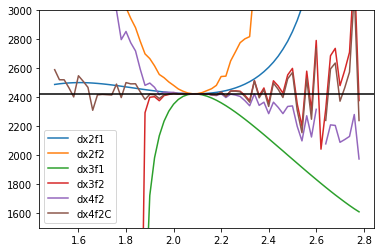

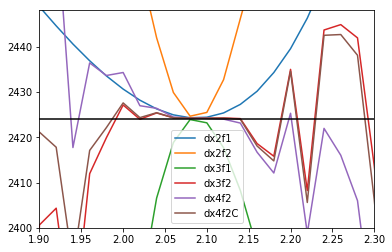

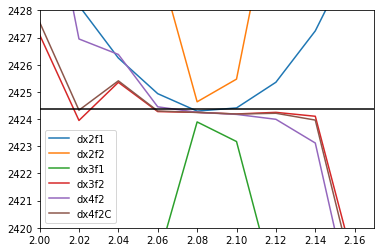

In [37]:
plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[1] for x in DerivativesH001],label='dx2f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx2f2(*x)[1] for x in DerivativesH001],label='dx2f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[1] for x in DerivativesH001],label='dx3f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f2(*x)[1] for x in DerivativesH001],label='dx3f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[1] for x in DerivativesH001],label='dx4f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2C(*x)[1] for x in DerivativesH001],label='dx4f2C')
plt.axhline(2424,color='black')
plt.ylim(1500,3000)
plt.legend()
plt.savefig('2nd_001fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[1] for x in DerivativesH001],label='dx2f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx2f2(*x)[1] for x in DerivativesH001],label='dx2f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[1] for x in DerivativesH001],label='dx3f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f2(*x)[1] for x in DerivativesH001],label='dx3f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[1] for x in DerivativesH001],label='dx4f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2C(*x)[1] for x in DerivativesH001],label='dx4f2C')
plt.axhline(2424,color='black')
plt.xlim(1.9,2.3) #+-.2 bohr
plt.ylim(2400,2448)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[1] for x in DerivativesH001],label='dx2f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx2f2(*x)[1] for x in DerivativesH001],label='dx2f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[1] for x in DerivativesH001],label='dx3f1')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f2(*x)[1] for x in DerivativesH001],label='dx3f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[1] for x in DerivativesH001],label='dx4f2')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2C(*x)[1] for x in DerivativesH001],label='dx4f2C')
plt.axhline(2424.36,color='black')
plt.xlim(2.0,2.17) #+-.05 bohr
plt.ylim(2420,2428)
plt.legend()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


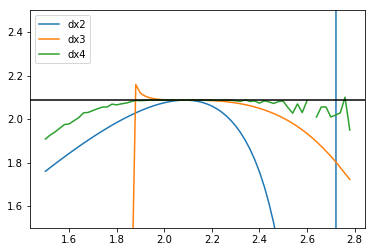

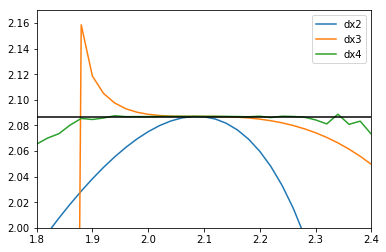

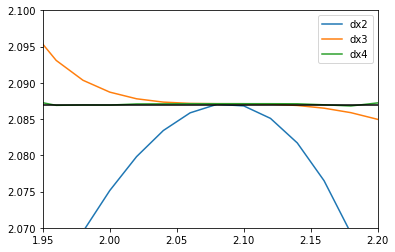

In [38]:
plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[0] for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[0] for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[0] for x in DerivativesH001],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(1.5,2.5)
plt.legend()
plt.savefig('dist_001fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[0] for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[0] for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[0] for x in DerivativesH001],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(2.0,2.17)
plt.xlim(1.8,2.4)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH001] ,[dx2f1(*x)[0] for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[dx3f1(*x)[0] for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[dx4f2(*x)[0] for x in DerivativesH001],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(2.07,2.10)
plt.xlim(1.95,2.2)
plt.legend()
plt.show()

Now we shall compare the energies - minimum energy: -112.78181256

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


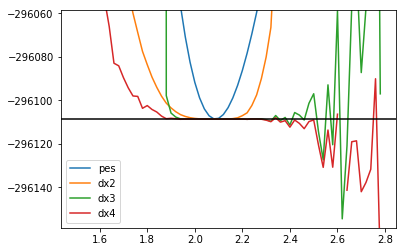

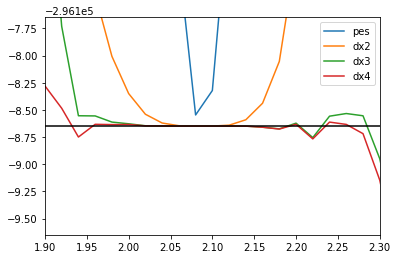

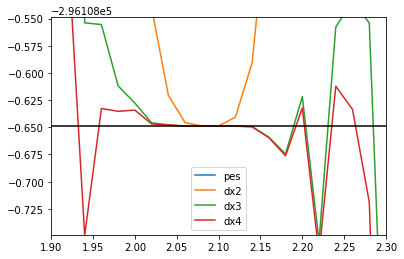

In [43]:
kjm=2625.50

plt.plot([x[0] for x in DerivativesH001],[x[1]*kjm  for x in DerivativesH001],label='pes')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-50,-112.78181256*kjm+50)
plt.legend()
plt.savefig('en_001fd.jpg')
plt.show()

# chemycal accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH001],[x[1]*kjm  for x in DerivativesH001],label='pes')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-1,-112.78181256*kjm+1)
plt.xlim(1.9,2.3)
plt.legend()
plt.show()

# chemycal accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH001],[x[1]*kjm  for x in DerivativesH001],label='pes')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx2')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx3')
plt.plot([x[0] for x in DerivativesH001] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH001],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-.1,-112.78181256*kjm+.1)
plt.xlim(1.9,2.3)
plt.legend()
plt.show()

In [193]:
DerivativesH05=[]
for x in np.linspace(1.5,2.8,66):
    DerivativesH001.append(FivePointDerivatives(x,.05))

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.30693e+01                          1      -95.1834253075785
   0  1.07164e+01                          2      -96.6027052824263
   0               1.000e+00    0.5284690  2 E                        -5.5422433
   1  1.86304e+00                          3     -111.6738758402500
   1               0.000e+00    1.0000000  3 E       

   0  1.06146e+01                          2      -97.5726821537567
   0               1.000e+00    0.5372411  2 E                        -5.2175980
   1  1.94521e+00                          3     -112.0022083920512
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  9.57533e-01                          4     -112.1678212677264
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  4.99354e-01                          5     -112.1960386588991
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.69542e-01                          6     -112.2033591702720
   4               1.000e+00    0.9722514  6 E                        -0.0000060
   5  1.35335e-01                          6     -112.2055543894850
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.31981e-02                          6     -112.2060670449281
   6               1.000e+00    0.9444

   4  3.04601e-01                          6     -112.4357802161750
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.79087e-01                          6     -112.4383670812963
   5               1.000e+00    0.8843590  6 E                        -0.0000450
   6  7.23973e-02                          6     -112.4394615045352
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.25121e-02                          6     -112.4396078811401
   7               1.000e+00    0.8884087  6 E                        -0.0000023
   8  1.74948e-02                          6     -112.4396694041217
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.02489e-02                          6     -112.4396780105398
   9               2.041e+09    0.9929970  6 M                                  
  10  4.02869e-03                          6     -112.4396816822268
  10               1.090e+10    1.9402

   6  6.29685e-02                          6     -112.1164059251737
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  3.34733e-02                          6     -112.1165177355922
   7               1.000e+00    0.9616229  6 E                        -0.0000002
   8  1.57765e-02                          6     -112.1165513981471
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  8.37664e-03                          6     -112.1165583490088
   9               2.210e+10    1.3677412  6 M                                  
  10  2.21914e-03                          6     -112.1165608626489
  10               7.617e+10    1.3543709  6 M                                  
  11  1.89824e-04                          6     -112.1165610514874
  11               2.881e+11    1.1048776  6 M                                  
  12  3.95609e-06                          6     -112.1165610528725
  12               2.668e+12    1.2512

  10  3.83082e-03                          6     -112.3791532966409
  10               2.014e+10    1.8718903  6 M                                  
  11  6.53012e-04                          6     -112.3791538862816
  11               3.013e+10    1.2105062  6 M                                  
  12  1.94140e-05                          6     -112.3791539036661
  12               2.406e+11    1.2130458  6 M                                  
  13  2.22014e-07                          6     -112.3791539036813
  13               1.254e+12    1.1371547  6 M                                  
  14  6.16468e-09                          6     -112.3791539036815
  14               1.560e+13    1.2084204  6 C                                  
  15  1.04604e-09                          6     -112.3791539036812
  15               2.538e+13    0.8851009  6 C                                  
  16  1.86552e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.80792e-06                          6     -112.0160522503734
  12               3.452e+12    1.2060217  6 M                                  
  13  1.39324e-08                          6     -112.0160522503737
  13               1.991e+13    1.1523628  6 M                                  
  14  1.23789e-09                          6     -112.0160522503734
  14               4.337e+14    1.2664285  6 C                                  
  15  1.58996e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      117.073755830874
                                           hartree       86.050729099365
                                              x_hf      -13.997578176590

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26807e+01                          1      -96.1104269960494
   0  1.04900e+01                          2      -98.2385992375951
   0               1.000e+00    0.5442512  2 E                        -4.9946249
   1  2.08518e+00                          3     -112.1859904922143
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.17038e+00                          4     -112.3621396072617
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  6.70247e-01                          5     -112.4016222113159
   3               1.000e+00    0.9161743  5 E                        -0.0003333
   4 

   0  1.06602e+01                          2      -97.2145521052766
   0               1.000e+00    0.5338066  2 E                        -5.3385254
   1  1.90262e+00                          3     -111.8882570309332
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  8.87022e-01                          4     -112.0514963858892
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  4.41350e-01                          5     -112.0763311603884
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.29880e-01                          6     -112.0822006743397
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.21081e-01                          6     -112.0837383297756
   5               1.000e+00    0.9882389  6 E                        -0.0000002
   6  6.13457e-02                          6     -112.0841633890406
   6               1.000e+00    0.9977

   4  2.99140e-01                          6     -112.3536059388633
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.70499e-01                          6     -112.3561167986688
   5               1.000e+00    0.9075149  6 E                        -0.0000264
   6  7.23107e-02                          6     -112.3570734470602
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.11858e-02                          6     -112.3572192133036
   7               1.000e+00    0.9063929  6 E                        -0.0000016
   8  1.74153e-02                          6     -112.3572751041069
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  9.90233e-03                          6     -112.3572835572887
   9               4.266e+09    1.0406682  6 M                                  
  10  3.78070e-03                          6     -112.3572869318174
  10               2.515e+10    1.8484

   8  1.85297e-02                          6     -112.5402338130638
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.14972e-02                          6     -112.5402427186810
   9               1.000e+00    0.8154871  6 E                        -0.0000005
  10  3.61737e-03                          6     -112.5402475648321
  10               1.377e+11    1.1671940  6 M                                  
  11  1.91461e-03                          6     -112.5402479581075
  11               2.758e+11    1.5033177  6 M                                  
  12  7.67166e-05                          6     -112.5402481074200
  12               1.329e+12    1.1316526  6 M                                  
  13  1.60831e-06                          6     -112.5402481076629
  13               4.315e+12    1.0906804  6 M                                  
  14  6.22937e-09                          6     -112.5402481076627
  14               1.038e+14    1.2574

  10  4.15398e-03                          6     -112.2862146830660
  10               3.057e+10    1.7033589  6 M                                  
  11  4.98686e-04                          6     -112.2862153586303
  11               7.981e+10    1.1718860  6 M                                  
  12  1.82599e-05                          6     -112.2862153684368
  12               3.652e+11    1.1652795  6 M                                  
  13  1.51063e-07                          6     -112.2862153684499
  13               5.531e+12    1.2403539  6 M                                  
  14  3.09398e-09                          6     -112.2862153684507
  14               2.069e+14    1.2656140  6 C                                  
  15  2.27368e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  9.03191e-09                          6     -112.4931607888127
  14               5.548e+12    1.1301764  6 M                                  
  15  1.31775e-09                          6     -112.4931607888119
  15               2.527e+13    0.9518984  6 C                                  
  16  2.92348e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.185415156536
                                           hartree       82.701309489826
                                              x_hf      -13.759381992676
                                                ne     -326.068356203235
                                                nn       29.447852760736
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.27631e+01                          1      -95.9707663158394
   0  1.05489e+01                          2      -97.9659075228613
   0               1.000e+00    0.5412799  2 E                        -5.0851102
   1  2.01589e+00                          3     -112.1158703655708
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.06653e+00                          4     -112.2864932452022
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  5.87047e-01                          5     -112.3202869548784
   3               1.000e+00    0.9633676  5 E  

   0               1.000e+00    0.5884814  2 E                        -5.1466328
   1  3.00589e+00                          3     -112.0135643061768
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.98323e+00                          4     -112.3615687126830
   2               1.000e+00    0.9750700  4 E                        -0.0002276
   3  1.12693e+00                          5     -112.4723028288394
   3               1.000e+00    0.8730686  5 E                        -0.0023911
   4  4.51372e-01                          6     -112.5167160761436
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.77250e-01                          6     -112.5220941296687
   5               1.000e+00    0.8275424  6 E                        -0.0002442
   6  9.13079e-02                          6     -112.5248769459141
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.62688e-02        

   2  9.98352e-01                          4     -112.2186789907237
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  5.32342e-01                          5     -112.2489359092299
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.92481e-01                          6     -112.2571480756580
   4               1.000e+00    0.9509470  6 E                        -0.0000219
   5  1.39874e-01                          6     -112.2598181225865
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  7.68173e-02                          6     -112.2603633478017
   6               1.000e+00    0.9311028  6 E                        -0.0000030
   7  3.43455e-02                          6     -112.2605512173327
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.88776e-02                          6     -112.2605839245937
   8               1.000e+00    0.9279

   6  7.24823e-02                          6     -112.4758511132254
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.32139e-02                          6     -112.4759980653993
   7               1.000e+00    0.8800805  6 E                        -0.0000028
   8  1.75860e-02                          6     -112.4760626264609
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.04557e-02                          6     -112.4760713781676
   9               1.523e+09    0.9651092  6 M                                  
  10  4.20028e-03                          6     -112.4760752213837
  10               8.003e+09    1.9847058  6 M                                  
  11  8.41462e-04                          6     -112.4760759600451
  11               1.020e+10    1.2723702  6 M                                  
  12  2.60360e-05                          6     -112.4760759901417
  12               1.050e+11    1.2334

  10  4.82785e-03                          6     -112.6175833920416
  10               5.045e+09    1.1738321  6 M                                  
  11  6.92004e-04                          6     -112.6175843571307
  11               2.109e+10    1.2328712  6 M                                  
  12  9.16095e-05                          6     -112.6175843767177
  12               3.377e+10    1.1701536  6 M                                  
  13  9.99943e-07                          6     -112.6175843770715
  13               3.540e+11    1.0038123  6 M                                  
  14  2.05075e-08                          6     -112.6175843770715
  14               1.761e+12    1.1978536  6 C                                  
  15  2.46496e-09                          6     -112.6175843770717
  15               2.076e+13    1.1344538  6 C                                  
  16  4.06455e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  2.16963e-05                          6     -112.4203239893280
  12               1.649e+11    1.2129543  6 M                                  
  13  2.61578e-07                          6     -112.4203239893482
  13               8.470e+11    1.1413374  6 M                                  
  14  7.78397e-09                          6     -112.4203239893479
  14               6.508e+12    1.1575251  6 M                                  
  15  1.54558e-09                          6     -112.4203239893481
  15               1.833e+13    0.8774836  6 C                                  
  16  2.33993e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.526838267

  14  5.46260e-08                          6     -112.5815419163470
  14               1.071e+13    1.0148148  6 M                                  
  15  2.30410e-09                          6     -112.5815419163470
  15               2.477e+13    1.0272303  6 C                                  
  16  3.10290e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.721919594543
                                           hartree       81.763572548868
                                              x_hf      -13.694289941163
                                                ne     -323.775110982500
                                                nn       28.402366863905
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.26394e+01                          1      -96.1709136375667
   0  1.04587e+01                          2      -98.3615583607860
   0               1.000e+00    0.5456392  2 E                        -4.9545721
   1  2.12363e+00                          3     -112.2146580127294
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.22786e+00                          4     -112.3940131179852
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  7.16493e-01                          5     -112.4367933415359
   3               1.000e+00    0.8946890  5 E  

   0  1.02254e+01                          2      -96.6219904899839
   0               1.000e+00    0.5875186  2 E                        -5.1474196
   1  3.03412e+00                          3     -112.0693140563858
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.16947e+00                          4     -112.4074219384891
   2               1.000e+00    0.8945505  4 E                        -0.0047644
   3  1.03729e+00                          5     -112.5599815633790
   3               1.000e+00    0.9577726  5 E                        -0.0002971
   4  5.85152e-01                          6     -112.5916544999298
   4               1.000e+00    0.8712628  6 E                        -0.0007069
   5  2.43038e-01                          6     -112.6036559780884
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.54660e-01                          6     -112.6051156590045
   6               1.000e+00    0.7853

   1  2.06688e+00                          3     -112.1700930514837
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.14303e+00                          4     -112.3447442961994
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  6.48307e-01                          5     -112.3826944383415
   3               1.000e+00    0.9274267  5 E                        -0.0002338
   4  3.01751e-01                          6     -112.3963697484487
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.74685e-01                          6     -112.3989167403617
   5               1.000e+00    0.8958529  6 E                        -0.0000349
   6  7.23335e-02                          6     -112.3999395641916
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.18325e-02                          6     -112.4000855192272
   7               1.000e+00    0.8971

   4               1.000e+00    0.9734942  6 E                        -0.0000284
   5  2.97627e-01                          6     -112.5647348600986
   5               1.000e+00    0.8582017  6 E                        -0.0002115
   6  1.12785e-01                          6     -112.5678536966461
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  7.09270e-02                          6     -112.5681796166765
   7               1.000e+00    0.8034864  6 E                        -0.0000207
   8  2.14944e-02                          6     -112.5683671697357
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.35226e-02                          6     -112.5683789721177
   9               1.000e+00    0.8023276  6 E                        -0.0000008
  10  4.07765e-03                          6     -112.5683857969431
  10               4.907e+09    1.0111281  6 M                                  
  11  2.27066e-03        

   8  2.04405e-02                          6     -112.6758201610961
   8               1.000e+00    0.7533829  6 E                        -0.0000027
   9  5.43543e-03                          6     -112.6758370647443
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.60874e-03                          6     -112.6758377642616
  10               1.338e+10    1.5493435  6 M                                  
  11  2.73536e-04                          6     -112.6758383272674
  11               4.851e+10    1.3147750  6 M                                  
  12  2.34885e-05                          6     -112.6758383304422
  12               3.282e+10    1.0530427  6 M                                  
  13  1.29391e-07                          6     -112.6758383304659
  13               3.577e+11    1.0164617  6 M                                  
  14  1.66262e-08                          6     -112.6758383304657
  14               1.128e+12    1.0956

   9               1.000e+00    0.8217979  6 E                        -0.0000004
  10  3.60058e-03                          6     -112.5252238379143
  10               1.156e+11    1.2569126  6 M                                  
  11  1.70194e-03                          6     -112.5252242559037
  11               2.593e+11    1.4277442  6 M                                  
  12  8.04935e-05                          6     -112.5252243733580
  12               1.638e+12    1.1267342  6 M                                  
  13  1.55753e-06                          6     -112.5252243736233
  13               6.623e+12    1.0709066  6 M                                  
  14  4.63691e-09                          6     -112.5252243736236
  14               1.752e+14    1.2230100  6 M                                  
  15  2.89810e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
             

  12  3.20298e-05                          6     -112.6488675764802
  12               7.663e+10    1.0843396  6 M                                  
  13  2.11635e-07                          6     -112.6488675765244
  13               6.662e+11    1.0447455  6 M                                  
  14  1.39071e-08                          6     -112.6488675765244
  14               2.111e+12    1.0709381  6 C                                  
  15  1.36803e-09                          6     -112.6488675765241
  15               1.893e+13    1.0966214  6 C                                  
  16  3.01735e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.311374632

  14  6.95687e-09                          6     -112.4760759901703
  14               1.844e+13    1.1625590  6 M                                  
  15  1.12827e-09                          6     -112.4760759901701
  15               1.767e+13    0.8431820  6 C                                  
  16  2.32676e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      115.268236727321
                                           hartree       82.862887326546
                                              x_hf      -13.770676687144
                                                ne     -326.466152986523
                                                nn       29.629629629630
  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.23689e+01                          1      -91.7542001028430
   0  1.03305e+01                          2      -96.9562394159548
   0               1.000e+00    0.5863098  2 E                        -5.1574401
   1  3.07829e+00                          3     -112.0938477738181
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.39396e+00                          4     -112.4211862441138
   2               1.000e+00    0.8208153  4 E                        -0.0163800
   3  9.51575e-01                          5     -112.6270624062026
   3               0.000e+00    1.0000000  5 E  

   0  1.04097e+01                          2      -98.5299346123171
   0               1.000e+00    0.5475918  2 E                        -4.9008961
   1  2.18551e+00                          3     -112.2501588748495
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  1.32107e+00                          4     -112.4347756363498
   2               0.000e+00    1.0000000  4 E                         0.0000000
   3  7.92038e-01                          5     -112.4831152979097
   3               1.000e+00    0.8648107  5 E                        -0.0012109
   4  3.10866e-01                          6     -112.5053774967102
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.88492e-01                          6     -112.5080519549726
   5               1.000e+00    0.8617460  6 E                        -0.0000707
   6  7.25709e-02                          6     -112.5093068116752
   6               0.000e+00    1.0000

   2  2.27676e+00                          4     -112.4182983595222
   2               1.000e+00    0.8568618  4 E                        -0.0095606
   3  9.93970e-01                          5     -112.5958530778834
   3               1.000e+00    0.9981498  5 E                        -0.0000006
   4  6.58184e-01                          6     -112.6204921490633
   4               1.000e+00    0.7717055  6 E                        -0.0023631
   5  1.87253e-01                          6     -112.6374490642875
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.21421e-01                          6     -112.6383099890048
   6               1.000e+00    0.7740963  6 E                        -0.0000801
   7  3.46302e-02                          6     -112.6388896295008
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.23682e-02                          6     -112.6389188026782
   8               1.000e+00    0.7720

   4  6.17911e-01                          6     -112.7015461184089
   4               1.000e+00    0.7236591  6 E                        -0.0029621
   5  1.52280e-01                          6     -112.7173759449403
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.06300e-01                          6     -112.7179255016915
   6               1.000e+00    0.7322962  6 E                        -0.0000848
   7  2.71094e-02                          6     -112.7183960059983
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.87911e-02                          6     -112.7184131163687
   8               1.000e+00    0.7293883  6 E                        -0.0000027
   9  4.68958e-03                          6     -112.7184279008121
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.24157e-03                          6     -112.7184284079951
  10               7.419e+09    1.7043

   6  1.54660e-01                          6     -112.6051156590045
   6               1.000e+00    0.7853092  6 E                        -0.0001179
   7  4.50226e-02                          6     -112.6060381293961
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.85356e-02                          6     -112.6060880808833
   8               1.000e+00    0.7854171  6 E                        -0.0000040
   9  8.28492e-03                          6     -112.6061195071569
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  5.25182e-03                          6     -112.6061211954217
  10               3.343e+09    0.9941686  6 M                                  
  11  8.94775e-04                          6     -112.6061223222129
  11               2.796e+10    1.3113723  6 M                                  
  12  1.35943e-04                          6     -112.6061223546603
  12               8.855e+10    1.2731

   8  1.94662e-02                          6     -112.6988858066896
   8               1.000e+00    0.7407551  6 E                        -0.0000027
   9  4.99755e-03                          6     -112.6989014126057
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.38608e-03                          6     -112.6989019955433
  10               9.218e+09    1.6246435  6 M                                  
  11  2.20536e-04                          6     -112.6989024988206
  11               3.186e+10    1.2944811  6 M                                  
  12  1.79722e-05                          6     -112.6989025009200
  12               2.043e+10    1.0309414  6 M                                  
  13  9.20306e-08                          6     -112.6989025009347
  13               2.540e+11    1.0212613  6 M                                  
  14  1.80737e-08                          6     -112.6989025009346
  14               7.084e+11    1.0922

  10  4.07765e-03                          6     -112.5683857969431
  10               4.907e+09    1.0111281  6 M                                  
  11  2.27066e-03                          6     -112.5683862786290
  11               9.384e+10    1.5460913  6 M                                  
  12  1.16880e-04                          6     -112.5683864901585
  12               8.123e+11    1.1758961  6 M                                  
  13  3.67208e-06                          6     -112.5683864907253
  13               1.573e+12    1.1110608  6 M                                  
  14  1.71280e-08                          6     -112.5683864907254
  14               4.490e+13    1.3160612  6 M                                  
  15  9.20096e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  1.66262e-08                          6     -112.6758383304657
  14               1.128e+12    1.0956400  6 C                                  
  15  1.74911e-09                          6     -112.6758383304660
  15               1.273e+13    1.1176679  6 C                                  
  16  3.46467e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.124166716373
                                           hartree       80.453518018320
                                              x_hf      -13.604755403440
                                                ne     -320.615059796550
                                                nn       26.966292134831
  

  16  4.39669e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.577198447693
                                           hartree       79.122186238122
                                              x_hf      -13.515593875145
                                                ne     -317.455241452127
                                                nn       25.531914893617
                                             total     -112.739535747840
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: -0.8317360733303047 4.337183432931604 -14.40612734307933 45.91056448816743 to cm: 4087.2434839132734
Ini

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.22545e+01                          1      -91.9548918241253
   0  1.03797e+01                          2      -97.1044632783726
   0               1.000e+00    0.5855774  2 E                        -5.1673624
   1  3.10469e+00                          3     -112.0955240501466
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.52144e+00                          4     -112.4159731261795
   2               1.000e+00    0.7862739  4 E                        -0.0255660
   3  9.09866e-01                          5     -112.6540551101208
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4 

   0  1.05032e+01                          2      -97.5026692531198
   0               1.000e+00    0.5823616  2 E                        -5.2307730
   1  3.20267e+00                          3     -112.0564112577603
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.02635e+00                          4     -112.3360867611703
   2               1.000e+00    0.6797931  4 E                        -0.0797467
   3  7.70444e-01                          5     -112.7186270207041
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.83949e-01                          6     -112.7327295375017
   4               1.000e+00    0.7070266  6 E                        -0.0029235
   5  1.41856e-01                          6     -112.7472201844621
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.03367e-01                          6     -112.7476906607561
   6               1.000e+00    0.7130

   2  2.39396e+00                          4     -112.4211862441137
   2               1.000e+00    0.8208153  4 E                        -0.0163800
   3  9.51575e-01                          5     -112.6270624062025
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.49806e-01                          6     -112.6491210936075
   4               1.000e+00    0.7529910  6 E                        -0.0026599
   5  1.73594e-01                          6     -112.6659969273881
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.15089e-01                          6     -112.6667280992823
   6               1.000e+00    0.7603184  6 E                        -0.0000807
   7  3.15654e-02                          6     -112.6672587191568
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.08277e-02                          6     -112.6672826050512
   8               1.000e+00    0.7578

   4  6.02014e-01                          6     -112.7185354792085
   4               1.000e+00    0.7140756  6 E                        -0.0029862
   5  1.46000e-01                          6     -112.7337618058095
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.04142e-01                          6     -112.7342634596307
   6               1.000e+00    0.7223222  6 E                        -0.0000870
   7  2.60463e-02                          6     -112.7347216668782
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.84323e-02                          6     -112.7347373054150
   8               1.000e+00    0.7190589  6 E                        -0.0000028
   9  4.49909e-03                          6     -112.7347517524738
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.17168e-03                          6     -112.7347522146835
  10               6.619e+09    1.7813

   6  1.21421e-01                          6     -112.6383099890048
   6               1.000e+00    0.7740963  6 E                        -0.0000801
   7  3.46302e-02                          6     -112.6388896295006
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.23682e-02                          6     -112.6389188026783
   8               1.000e+00    0.7720541  6 E                        -0.0000028
   9  6.28439e-03                          6     -112.6389385275298
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  4.05949e-03                          6     -112.6389394831508
  10               3.509e+10    1.4621127  6 M                                  
  11  3.94878e-04                          6     -112.6389401802544
  11               1.606e+11    1.3248982  6 M                                  
  12  3.76992e-05                          6     -112.6389401867375
  12               1.482e+11    1.1110

   8  1.87911e-02                          6     -112.7184131163687
   8               1.000e+00    0.7293883  6 E                        -0.0000027
   9  4.68958e-03                          6     -112.7184279008122
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.24157e-03                          6     -112.7184284079951
  10               7.419e+09    1.7043728  6 M                                  
  11  1.85486e-04                          6     -112.7184288761534
  11               2.559e+10    1.2710098  6 M                                  
  12  1.45270e-05                          6     -112.7184288776688
  12               1.634e+10    1.0246316  6 M                                  
  13  7.69121e-08                          6     -112.7184288776788
  13               2.108e+11    1.0307896  6 M                                  
  14  1.85108e-08                          6     -112.7184288776786
  14               5.389e+11    1.0810

  10  3.24541e-03                          6     -112.7620471978045
  10               4.388e+09    1.8981889  6 M                                  
  11  1.52779e-04                          6     -112.7620476904582
  11               2.033e+10    1.2077722  6 M                                  
  12  1.24791e-05                          6     -112.7620476915677
  12               4.522e+10    1.1758618  6 M                                  
  13  5.39777e-08                          6     -112.7620476915757
  13               9.117e+11    1.1840621  6 M                                  
  14  7.34119e-09                          6     -112.7620476915758
  14               1.654e+12    1.1332194  6 C                                  
  15  1.33107e-09                          6     -112.7620476915755
  15               1.308e+13    1.0522571  6 C                                  
  16  3.12390e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.79722e-05                          6     -112.6989025009199
  12               2.043e+10    1.0309414  6 M                                  
  13  9.20306e-08                          6     -112.6989025009346
  13               2.540e+11    1.0212613  6 M                                  
  14  1.80737e-08                          6     -112.6989025009347
  14               7.084e+11    1.0922795  6 C                                  
  15  2.03459e-09                          6     -112.6989025009341
  15               9.409e+12    1.1327702  6 C                                  
  16  3.83293e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.948108930

  14  1.44251e-08                          6     -112.7520586792311
  14               4.499e+11    0.9981939  6 C                                  
  15  2.20171e-09                          6     -112.7520586792308
  15               6.052e+12    1.1427873  6 C                                  
  16  4.56720e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.433950413033
                                           hartree       78.746307187081
                                              x_hf      -13.490776279597
                                                ne     -316.572430052104
                                                nn       25.130890052356
  

  16  3.46462e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      114.124166716373
                                           hartree       80.453518018320
                                              x_hf      -13.604755403440
                                                ne     -320.615059796550
                                                nn       26.966292134831
                                             total     -112.675838330466
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.17732e+01                          1      -92.7274943774898
   0  1.05228e+01                          2      -97.5931262697110
   0               1.000e+00    0.5811446  2 E                        -5.2599017
   1  3.23246e+00                          3     -112.0328523134909
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.20339e+00                          4     -112.2913824200206
   2               1.000e+00    0.6498418  4 E                        -0.1057734
   3  7.26582e-01                          5     -112.7316845910844
   3               0.000e+00    1.0000000  5 E  

   0  1.03797e+01                          2      -97.1044632783726
   0               1.000e+00    0.5855774  2 E                        -5.1673624
   1  3.10469e+00                          3     -112.0955240501466
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  2.52144e+00                          4     -112.4159731261795
   2               1.000e+00    0.7862739  4 E                        -0.0255660
   3  9.09866e-01                          5     -112.6540551101208
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.36772e-01                          6     -112.6739689373894
   4               1.000e+00    0.7394097  6 E                        -0.0028242
   5  1.63423e-01                          6     -112.6904465524184
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.10786e-01                          6     -112.6910872355700
   6               1.000e+00    0.7474

   2  3.02635e+00                          4     -112.3360867611703
   2               1.000e+00    0.6797931  4 E                        -0.0797467
   3  7.70444e-01                          5     -112.7186270207041
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.83949e-01                          6     -112.7327295375017
   4               1.000e+00    0.7070266  6 E                        -0.0029235
   5  1.41856e-01                          6     -112.7472201844621
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.03367e-01                          6     -112.7476906607561
   6               1.000e+00    0.7130108  6 E                        -0.0000910
   7  2.54576e-02                          6     -112.7481483646233
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.83883e-02                          6     -112.7481631625278
   8               1.000e+00    0.7094

   4  4.99060e-01                          6     -112.7635267850794
   4               1.000e+00    0.7183115  6 E                        -0.0018860
   5  1.52048e-01                          6     -112.7742096505485
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.19276e-01                          6     -112.7747051900466
   6               1.000e+00    0.6708146  6 E                        -0.0001572
   7  2.54272e-02                          6     -112.7753465737613
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.95970e-02                          6     -112.7753608428892
   8               1.000e+00    0.6809257  6 E                        -0.0000040
   9  4.54335e-03                          6     -112.7753782038073
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.46664e-03                          6     -112.7753786596483
  10               1.482e+09    1.8560

   6  1.04142e-01                          6     -112.7342634596307
   6               1.000e+00    0.7223222  6 E                        -0.0000870
   7  2.60463e-02                          6     -112.7347216668782
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.84323e-02                          6     -112.7347373054150
   8               1.000e+00    0.7190589  6 E                        -0.0000028
   9  4.49909e-03                          6     -112.7347517524738
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.17168e-03                          6     -112.7347522146835
  10               6.619e+09    1.7813134  6 M                                  
  11  1.63877e-04                          6     -112.7347526695053
  11               2.371e+10    1.2462308  6 M                                  
  12  1.25564e-05                          6     -112.7347526707146
  12               1.633e+10    1.0441

   8  1.91917e-02                          6     -112.7697297032987
   8               1.000e+00    0.6885096  6 E                        -0.0000037
   9  4.45983e-03                          6     -112.7697461310150
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.34554e-03                          6     -112.7697465733970
  10               2.694e+09    1.8984805  6 M                                  
  11  1.65098e-04                          6     -112.7697471046425
  11               1.532e+10    1.2121693  6 M                                  
  12  1.49760e-05                          6     -112.7697471059695
  12               3.807e+10    1.1637756  6 M                                  
  13  8.21287e-08                          6     -112.7697471059799
  13               1.733e+11    1.0684085  6 M                                  
  14  1.20541e-08                          6     -112.7697471059797
  14               3.726e+11    1.0054

  10  3.24157e-03                          6     -112.7184284079951
  10               7.419e+09    1.7043728  6 M                                  
  11  1.85486e-04                          6     -112.7184288761534
  11               2.559e+10    1.2710098  6 M                                  
  12  1.45270e-05                          6     -112.7184288776688
  12               1.634e+10    1.0246316  6 M                                  
  13  7.69121e-08                          6     -112.7184288776788
  13               2.108e+11    1.0307896  6 M                                  
  14  1.85108e-08                          6     -112.7184288776786
  14               5.389e+11    1.0810323  6 C                                  
  15  2.19584e-09                          6     -112.7184288776781
  15               7.660e+12    1.1405293  6 C                                  
  16  4.10977e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.24791e-05                          6     -112.7620476915677
  12               4.522e+10    1.1758618  6 M                                  
  13  5.39777e-08                          6     -112.7620476915757
  13               9.117e+11    1.1840621  6 M                                  
  14  7.34119e-09                          6     -112.7620476915758
  14               1.654e+12    1.1332194  6 C                                  
  15  1.33107e-09                          6     -112.7620476915755
  15               1.308e+13    1.0522571  6 C                                  
  16  3.12390e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.299362422

  14  2.58289e-08                          6     -112.7800200575254
  14               1.505e+11    1.1357702  6 C                                  
  15  4.27633e-09                          6     -112.7800200575256
  15               3.860e+12    1.1787683  6 C                                  
  16  7.96096e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.907192495698
                                           hartree       77.231416501319
                                              x_hf      -13.392446383090
                                                ne     -313.055594436158
                                                nn       23.529411764706
  

  16  4.56720e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.433950413033
                                           hartree       78.746307187081
                                              x_hf      -13.490776279597
                                                ne     -316.572430052104
                                                nn       25.130890052356
                                             total     -112.752058679231
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.13257e+01                          1      -93.3547329515122
   0  1.04885e+01                          2      -97.8406323608028
   0               1.000e+00    0.5746085  2 E                        -5.4401287
   1  3.34463e+00                          3     -111.8831792439043
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.10748e+00                          4     -111.9615238789868
   2               1.000e+00    0.5285546  4 E                        -0.3049061
   3  5.15015e-01                          5     -112.7629427279449
   3               0.000e+00    1.0000000  5 E  

   0  1.05228e+01                          2      -97.5931262697110
   0               1.000e+00    0.5811446  2 E                        -5.2599017
   1  3.23246e+00                          3     -112.0328523134909
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.20339e+00                          4     -112.2913824200206
   2               1.000e+00    0.6498418  4 E                        -0.1057734
   3  7.26582e-01                          5     -112.7316845910844
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.63029e-01                          6     -112.7444316916658
   4               1.000e+00    0.7034092  6 E                        -0.0027563
   5  1.40342e-01                          6     -112.7580234933569
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.04464e-01                          6     -112.7584795146221
   6               1.000e+00    0.7033

   2  3.88052e+00                          4     -112.0593573284824
   2               1.000e+00    0.5552521  4 E                        -0.2435330
   3  5.66731e-01                          5     -112.7589594441309
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.63520e-01                          6     -112.7687193656197
   4               1.000e+00    0.7438505  6 E                        -0.0013130
   5  1.67705e-01                          6     -112.7777221908994
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.34914e-01                          6     -112.7782772506475
   6               1.000e+00    0.6493581  6 E                        -0.0002285
   7  2.52067e-02                          6     -112.7791134930568
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.97644e-02                          6     -112.7791274435300
   8               1.000e+00    0.6748

   4  5.83949e-01                          6     -112.7327295375017
   4               1.000e+00    0.7070266  6 E                        -0.0029235
   5  1.41856e-01                          6     -112.7472201844621
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.03367e-01                          6     -112.7476906607561
   6               1.000e+00    0.7130108  6 E                        -0.0000910
   7  2.54576e-02                          6     -112.7481483646233
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.83883e-02                          6     -112.7481631625278
   8               1.000e+00    0.7094146  6 E                        -0.0000030
   9  4.40838e-03                          6     -112.7481777545838
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.16832e-03                          6     -112.7481781945472
  10               6.040e+09    1.8464

   6  1.19276e-01                          6     -112.7747051900466
   6               1.000e+00    0.6708146  6 E                        -0.0001572
   7  2.54272e-02                          6     -112.7753465737613
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.95970e-02                          6     -112.7753608428892
   8               1.000e+00    0.6809257  6 E                        -0.0000040
   9  4.54335e-03                          6     -112.7753782038073
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.46664e-03                          6     -112.7753786596483
  10               1.482e+09    1.8560924  6 M                                  
  11  1.92623e-04                          6     -112.7753792384788
  11               9.127e+09    1.2313301  6 M                                  
  12  2.07923e-05                          6     -112.7753792403241
  12               1.120e+10    1.0905

   8  9.19885e-03                          6     -112.7816828877166
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  7.86621e-03                          6     -112.7816849504216
   9               1.000e+00    0.6731368  6 E                        -0.0000006
  10  1.93508e-03                          6     -112.7816877365357
  10               1.603e+09    1.5475573  6 M                                  
  11  1.19200e-03                          6     -112.7816878935204
  11               1.662e+09    1.7232674  6 M                                  
  12  3.30431e-05                          6     -112.7816879623056
  12               1.157e+10    1.1507848  6 M                                  
  13  9.07498e-07                          6     -112.7816879623609
  13               9.087e+09    0.9648919  6 C                                  
  14  3.25854e-08                          6     -112.7816879623612
  14               1.666e+11    1.1484

   8  1.91917e-02                          6     -112.7697297032987
   8               1.000e+00    0.6885096  6 E                        -0.0000037
   9  4.45983e-03                          6     -112.7697461310150
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.34554e-03                          6     -112.7697465733970
  10               2.694e+09    1.8984805  6 M                                  
  11  1.65098e-04                          6     -112.7697471046425
  11               1.532e+10    1.2121693  6 M                                  
  12  1.49760e-05                          6     -112.7697471059695
  12               3.807e+10    1.1637756  6 M                                  
  13  8.21287e-08                          6     -112.7697471059799
  13               1.733e+11    1.0684085  6 M                                  
  14  1.20541e-08                          6     -112.7697471059797
  14               3.726e+11    1.0054

  10  8.28397e-03                          6     -112.7815809772884
  10               1.450e+09    1.4329566  6 M                                  
  11  4.24419e-04                          6     -112.7815842753208
  11               1.630e+10    1.4810597  6 M                                  
  12  4.68552e-05                          6     -112.7815842843391
  12               5.351e+10    1.0871851  6 M                                  
  13  1.13245e-06                          6     -112.7815842844489
  13               1.723e+12    1.2574398  6 M                                  
  14  1.40430e-08                          6     -112.7815842844486
  14               5.437e+12    1.1060245  6 M                                  
  15  2.22158e-09                          6     -112.7815842844489
  15               2.263e+13    0.9382275  6 C                                  
  16  4.27695e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.24791e-05                          6     -112.7620476915677
  12               4.522e+10    1.1758618  6 M                                  
  13  5.39777e-08                          6     -112.7620476915757
  13               9.117e+11    1.1840621  6 M                                  
  14  7.34119e-09                          6     -112.7620476915758
  14               1.654e+12    1.1332194  6 C                                  
  15  1.33107e-09                          6     -112.7620476915755
  15               1.308e+13    1.0522571  6 C                                  
  16  3.12390e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.299362422

  14  2.58289e-08                          6     -112.7800200575254
  14               1.505e+11    1.1357702  6 C                                  
  15  4.27633e-09                          6     -112.7800200575256
  15               3.860e+12    1.1787683  6 C                                  
  16  7.96096e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.907192495698
                                           hartree       77.231416501319
                                              x_hf      -13.392446383090
                                                ne     -313.055594436158
                                                nn       23.529411764706
  

  16  1.12282e-09                          6     -112.7798081692522
  16               4.197e+12    1.0998691  6 C                                  
  17  1.53440e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.590074302747
                                           hartree       76.180557982719
                                              x_hf      -13.325924892556
                                                ne     -310.654422104219
                                                nn       22.429906542056
                                             total     -112.779808169253
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  16  5.92053e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      113.016298460460
                                           hartree       77.565356179668
                                              x_hf      -13.413882035663
                                                ne     -313.825202353732
                                                nn       23.880597014925
                                             total     -112.776832734341
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of norma

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10102e+01                          1      -93.7507915214925
   0  1.03301e+01                          2      -97.8952453472280
   0               1.000e+00    0.5685296  2 E                        -5.6293862
   1  3.39699e+00                          3     -111.7362528049684
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.91249e+00                          4     -111.5288668918247
   2               1.000e+00    0.4470026  4 E                        -0.3909442
   3  3.53610e-01                          5     -112.7640129139872
   3               0.000e+00    1.0000000  5 E  

   0  1.05142e+01                          2      -97.8029960474327
   0               1.000e+00    0.5762804  2 E                        -5.3911828
   1  3.32233e+00                          3     -111.9233042175396
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  3.88052e+00                          4     -112.0593573284824
   2               1.000e+00    0.5552521  4 E                        -0.2435330
   3  5.66731e-01                          5     -112.7589594441309
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.63520e-01                          6     -112.7687193656197
   4               1.000e+00    0.7438505  6 E                        -0.0013130
   5  1.67705e-01                          6     -112.7777221908995
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.34914e-01                          6     -112.7782772506474
   6               1.000e+00    0.6493

   2  4.66646e+00                          4     -111.6763264980979
   2               1.000e+00    0.4701071  4 E                        -0.3893732
   3  3.96606e-01                          5     -112.7656017358789
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.03328e-01                          6     -112.7753975382280
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.56446e-01                          6     -112.7772176281693
   5               1.000e+00    0.6381002  6 E                        -0.0008631
   6  5.12531e-02                          6     -112.7803248280905
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.40161e-02                          6     -112.7803835612889
   7               1.000e+00    0.6555343  6 E                        -0.0000224
   8  1.00785e-02                          6     -112.7804730259380
   8               0.000e+00    1.0000

   4  4.99060e-01                          6     -112.7635267850795
   4               1.000e+00    0.7183115  6 E                        -0.0018860
   5  1.52048e-01                          6     -112.7742096505486
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  1.19276e-01                          6     -112.7747051900464
   6               1.000e+00    0.6708146  6 E                        -0.0001572
   7  2.54272e-02                          6     -112.7753465737609
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.95970e-02                          6     -112.7753608428892
   8               1.000e+00    0.6809257  6 E                        -0.0000040
   9  4.54335e-03                          6     -112.7753782038072
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  3.46664e-03                          6     -112.7753786596481
  10               1.482e+09    1.8560

   6  6.69273e-02                          6     -112.7814495397200
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.69163e-02                          6     -112.7815313711875
   7               1.000e+00    0.6253391  6 E                        -0.0000458
   8  9.19885e-03                          6     -112.7816828877170
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  7.86621e-03                          6     -112.7816849504215
   9               1.000e+00    0.6731368  6 E                        -0.0000006
  10  1.93508e-03                          6     -112.7816877365353
  10               1.603e+09    1.5475573  6 M                                  
  11  1.19200e-03                          6     -112.7816878935204
  11               1.662e+09    1.7232676  6 M                                  
  12  3.30432e-05                          6     -112.7816879623059
  12               1.157e+10    1.1507

   8  1.40444e-02                          6     -112.7732786181147
   8               1.196e+07    0.6974990  6 M                                  
   9  4.84785e-03                          6     -112.7732880681339
   9               1.054e+07    1.5043794  6 M                                  
  10  1.07709e-03                          6     -112.7732893074640
  10               2.112e+07    1.1285747  6 M                                  
  11  1.54947e-04                          6     -112.7732893686469
  11               1.958e+08    1.1182886  6 M                                  
  12  1.91501e-05                          6     -112.7732893698532
  12               1.109e+09    1.0703621  6 M                                  
  13  2.21159e-07                          6     -112.7732893698723
  13               6.741e+09    1.0461140  6 M                                  
  14  5.00534e-08                          6     -112.7732893698721
  14               1.286e+11    1.3146

  10  8.28397e-03                          6     -112.7815809772877
  10               1.450e+09    1.4329566  6 M                                  
  11  4.24419e-04                          6     -112.7815842753206
  11               1.630e+10    1.4810597  6 M                                  
  12  4.68552e-05                          6     -112.7815842843392
  12               5.351e+10    1.0871851  6 M                                  
  13  1.13244e-06                          6     -112.7815842844489
  13               1.723e+12    1.2574398  6 M                                  
  14  1.40430e-08                          6     -112.7815842844487
  14               5.437e+12    1.1060240  6 M                                  
  15  2.22158e-09                          6     -112.7815842844490
  15               2.263e+13    0.9382269  6 C                                  
  16  4.27688e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  12  1.37244e-05                          6     -112.7770569515943
  12               4.753e+10    1.0533888  6 M                                  
  13  4.51221e-07                          6     -112.7770569516041
  13               9.126e+10    1.2565991  6 C                                  
  14  9.49391e-09                          6     -112.7770569516033
  14               1.053e+12    1.0508444  6 C                                  
  15  2.18339e-09                          6     -112.7770569516035
  15               1.706e+12    1.2383405  6 C                                  
  16  2.56257e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.507558966

  14  2.58289e-08                          6     -112.7800200575254
  14               1.505e+11    1.1357702  6 C                                  
  15  4.27633e-09                          6     -112.7800200575255
  15               3.860e+12    1.1787693  6 C                                  
  16  7.96097e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.907192495698
                                           hartree       77.231416501319
                                              x_hf      -13.392446383091
                                                ne     -313.055594436158
                                                nn       23.529411764706
  

  15  5.34509e-09                          6     -112.7798081692522
  15               2.998e+11    1.1307829  6 C                                  
  16  1.12282e-09                          6     -112.7798081692521
  16               4.197e+12    1.0998725  6 C                                  
  17  1.53438e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.590074302747
                                           hartree       76.180557982719
                                              x_hf      -13.325924892556
                                                ne     -310.654422104218
                                                nn       22.429906542056
  

  16  7.06788e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.334971160096
                                           hartree       75.217781319620
                                              x_hf      -13.266294906558
                                                ne     -308.481900080543
                                                nn       21.428571428571
                                             total     -112.766871078814
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

the derivatives are: 0.07348517416457885 1.2605301743074426 -4.644168362972322 14.38805067209614 to cm: 2203.4501930078004
In

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10102e+01                          1      -93.7507915214925
   0  1.03301e+01                          2      -97.8952453472280
   0               1.000e+00    0.5685296  2 E                        -5.6293862
   1  3.39699e+00                          3     -111.7362528049684
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.91249e+00                          4     -111.5288668918247
   2               1.000e+00    0.4470026  4 E                        -0.3909442
   3  3.53610e-01                          5     -112.7640129139872
   3               0.000e+00    1.0000000  5 E  

   0  1.00802e+01                          2      -97.8633988366427
   0               1.000e+00    0.5620082  2 E                        -5.8480762
   1  3.41132e+00                          3     -111.5855596436364
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.70912e+00                          4     -110.9322049988690
   2               1.000e+00    0.3799252  4 E                        -0.3927021
   3  3.24196e-01                          5     -112.7472582350534
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.06711e-01                          6     -112.7614810739178
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  4.32523e-02                          6     -112.7629059876770
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.15572e-02                          6     -112.7630660995631
   6               0.000e+00    1.0000

   2  4.66646e+00                          4     -111.6763264980979
   2               1.000e+00    0.4701071  4 E                        -0.3893732
   3  3.96606e-01                          5     -112.7656017358789
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.03328e-01                          6     -112.7753975382280
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.56446e-01                          6     -112.7772176281693
   5               1.000e+00    0.6381002  6 E                        -0.0008631
   6  5.12531e-02                          6     -112.7803248280905
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.40161e-02                          6     -112.7803835612889
   7               1.000e+00    0.6555343  6 E                        -0.0000224
   8  1.00785e-02                          6     -112.7804730259380
   8               0.000e+00    1.0000

   5  5.99883e-02                          6     -112.7683285338375
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.81457e-02                          6     -112.7684807544276
   6               1.000e+00    0.8792181  6 E                        -0.0000029
   7  3.44059e-02                          6     -112.7685533709368
   7               1.000e+00    0.7297759  6 E                        -0.0000115
   8  1.09184e-02                          6     -112.7686070066315
   8               1.129e+07    1.0492942  6 M                                  
   9  9.93824e-03                          6     -112.7686090070216
   9               8.023e+07    2.0383590  6 M                                  
  10  1.69699e-04                          6     -112.7686139410467
  10               2.425e+08    1.1430911  6 M                                  
  11  5.01324e-06                          6     -112.7686139432974
  11               6.747e+09    1.1377

   6  6.69273e-02                          6     -112.7814495397200
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.69163e-02                          6     -112.7815313711875
   7               1.000e+00    0.6253391  6 E                        -0.0000458
   8  9.19885e-03                          6     -112.7816828877170
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  7.86621e-03                          6     -112.7816849504215
   9               1.000e+00    0.6731368  6 E                        -0.0000006
  10  1.93508e-03                          6     -112.7816877365353
  10               1.603e+09    1.5475573  6 M                                  
  11  1.19200e-03                          6     -112.7816878935204
  11               1.662e+09    1.7232676  6 M                                  
  12  3.30432e-05                          6     -112.7816879623059
  12               1.157e+10    1.1507

   8  1.40444e-02                          6     -112.7732786181147
   8               1.196e+07    0.6974990  6 M                                  
   9  4.84785e-03                          6     -112.7732880681339
   9               1.054e+07    1.5043794  6 M                                  
  10  1.07709e-03                          6     -112.7732893074640
  10               2.112e+07    1.1285747  6 M                                  
  11  1.54947e-04                          6     -112.7732893686469
  11               1.958e+08    1.1182886  6 M                                  
  12  1.91501e-05                          6     -112.7732893698532
  12               1.109e+09    1.0703621  6 M                                  
  13  2.21159e-07                          6     -112.7732893698723
  13               6.741e+09    1.0461140  6 M                                  
  14  5.00534e-08                          6     -112.7732893698721
  14               1.286e+11    1.3146

  10  1.38551e-03                          6     -112.7547132845847
  10               1.019e+08    1.3179633  6 M                                  
  11  3.00229e-04                          6     -112.7547133857654
  11               4.980e+08    1.1007690  6 M                                  
  12  4.81001e-05                          6     -112.7547133906470
  12               2.547e+09    1.1410052  6 M                                  
  13  4.34667e-07                          6     -112.7547133907674
  13               2.308e+10    1.0653424  6 M                                  
  14  4.81714e-08                          6     -112.7547133907673
  14               7.372e+10    1.2862644  6 C                                  
  15  5.52041e-09                          6     -112.7547133907675
  15               1.564e+11    1.0715902  6 C                                  
  16  9.27971e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  11  3.58316e-04                          6     -112.7770569452397
  11               4.058e+09    1.2135519  6 M                                  
  12  1.37244e-05                          6     -112.7770569515943
  12               4.753e+10    1.0533888  6 M                                  
  13  4.51221e-07                          6     -112.7770569516041
  13               9.126e+10    1.2565991  6 C                                  
  14  9.49391e-09                          6     -112.7770569516033
  14               1.053e+12    1.0508444  6 C                                  
  15  2.18339e-09                          6     -112.7770569516035
  15               1.706e+12    1.2383405  6 C                                  
  16  2.56257e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~

  14  1.82336e-08                          6     -112.7611375064708
  14               7.283e+11    1.1063177  6 M                                  
  15  3.60309e-09                          6     -112.7611375064706
  15               1.529e+11    1.0829943  6 C                                  
  16  4.64065e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.268880384698
                                           hartree       74.944733570174
                                              x_hf      -13.249628263539
                                                ne     -307.870497647143
                                                nn       21.145374449339
  

  14  2.49343e-08                          6     -112.7798081692526
  14               2.552e+11    1.0578665  6 C                                  
  15  5.34509e-09                          6     -112.7798081692522
  15               2.998e+11    1.1307829  6 C                                  
  16  1.12282e-09                          6     -112.7798081692521
  16               4.197e+12    1.0998725  6 C                                  
  17  1.53438e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      112.590074302747
                                           hartree       76.180557982719
                                              x_hf      -13.325924892556


Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.06402e+01                          1      -94.1714315700582
   0  9.99191e+00                          2      -97.8411120806908
   0               1.000e+00    0.5600241  2 E                        -5.9173866
   1  3.40825e+00                          3     -111.5422341173693
   1               0.000e+00    1.0000000  3 E      

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.10102e+01                          1      -93.7507915214925
   0  1.03301e+01                          2      -97.8952453472280
   0               1.000e+00    0.5685296  2 E                        -5.6293862
   1  3.39699e+00                          3     -111.7362528049687
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  4.91249e+00                          4     -111.5288668918243
   2               1.000e+00    0.4470026  4 E                        -0.3909442
   3  3.53610e-01                          5     -112.7640129139875
   3               0.000e+00    1.0000000  5 E  

   0               1.000e+00    0.5620082  2 E                        -5.8480762
   1  3.41132e+00                          3     -111.5855596436364
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.70912e+00                          4     -110.9322049988692
   2               1.000e+00    0.3799252  4 E                        -0.3927021
   3  3.24196e-01                          5     -112.7472582350534
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.06711e-01                          6     -112.7614810739181
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  4.32523e-02                          6     -112.7629059876772
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  3.15572e-02                          6     -112.7630660995631
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.73925e-02        

   1  3.38922e+00                          3     -111.4470131708016
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.38090e+00                          4     -110.2042461903271
   2               1.000e+00    0.3287877  4 E                        -0.3923340
   3  4.97245e-01                          5     -112.7136578225238
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.65013e-01                          6     -112.7316570647765
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  3.65386e-01                          6     -112.7328630799857
   5               1.000e+00    0.5467335  6 E                        -0.0026509
   6  5.43959e-02                          6     -112.7398721613376
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  4.74192e-02                          6     -112.7399696209988
   7               1.000e+00    0.7388

   1  3.41107e+00                          3     -111.6300449906000
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  5.47831e+00                          4     -111.1272083179288
   2               1.000e+00    0.3983703  4 E                        -0.3925997
   3  3.08527e-01                          5     -112.7541110117468
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.10605e-01                          6     -112.7670392581124
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  5.99883e-02                          6     -112.7683285338376
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  4.81457e-02                          6     -112.7684807544276
   6               1.000e+00    0.8792181  6 E                        -0.0000029
   7  3.44059e-02                          6     -112.7685533709372
   7               1.000e+00    0.7297

   3  4.32174e-01                          5     -112.7254114440674
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.71632e-01                          6     -112.7425098273896
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.54444e-01                          6     -112.7441091284093
   5               1.000e+00    0.6321009  6 E                        -0.0008193
   6  7.57222e-02                          6     -112.7473298175554
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  7.14294e-02                          6     -112.7473988974255
   7               1.000e+00    0.5676765  6 E                        -0.0000954
   8  1.20493e-02                          6     -112.7476676605066
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.01786e-02                          6     -112.7476720241764
   9               1.537e+07    1.1141

   2               1.000e+00    0.4182705  4 E                        -0.3921846
   3  3.15300e-01                          5     -112.7594077832483
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.61050e-01                          6     -112.7711480452945
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  1.26141e-01                          6     -112.7724105659340
   5               1.000e+00    0.9978233  6 E                        -0.0000000
   6  1.12281e-01                          6     -112.7726441502709
   6               1.000e+00    0.5912109  6 E                        -0.0002140
   7  1.69175e-02                          6     -112.7732713295796
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  1.40444e-02                          6     -112.7732786181147
   8               1.196e+07    0.6974990  6 M                                  
   9  4.84785e-03        

   5  1.53881e-01                          6     -112.7533248307203
   5               1.000e+00    0.9201965  6 E                        -0.0000123
   6  1.27258e-01                          6     -112.7538697259555
   6               1.000e+00    0.6422100  6 E                        -0.0002453
   7  2.63289e-02                          6     -112.7546677547463
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.61122e-02                          6     -112.7546781806676
   8               1.000e+00    0.5803073  6 E                        -0.0000114
   9  4.09976e-03                          6     -112.7547118551986
   9               3.064e+07    2.5162127  6 M                                  
  10  1.38551e-03                          6     -112.7547132845847
  10               1.019e+08    1.3179633  6 M                                  
  11  3.00229e-04                          6     -112.7547133857654
  11               4.980e+08    1.1007

   5  5.25485e-01                          6     -112.7143482809311
   5               1.000e+00    0.4968482  6 E                        -0.0066919
   6  3.91792e-02                          6     -112.7290881483056
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.54946e-02                          6     -112.7292276267719
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.66782e-02                          6     -112.7292449824313
   8               1.000e+00    0.6416540  6 E                        -0.0000079
   9  8.23701e-03                          6     -112.7292787058256
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  8.96269e-03                          6     -112.7292798792857
  10               1.000e+00    0.5825263  6 E                        -0.0000012
  11  1.82805e-03                          6     -112.7292838670435
  11               1.098e+08    3.9564

   5  6.62210e-02                          6     -112.7607760201575
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  5.87476e-02                          6     -112.7609507712128
   6               1.000e+00    0.7995960  6 E                        -0.0000117
   7  3.24302e-02                          6     -112.7610780589420
   7               1.000e+00    0.8254768  6 E                        -0.0000060
   8  1.68570e-02                          6     -112.7611227344510
   8               1.000e+00    0.8812842  6 E                        -0.0000008
   9  1.00820e-02                          6     -112.7611319739110
   9               1.773e+07    2.1360791  6 M                                  
  10  5.59675e-04                          6     -112.7611374898531
  10               1.598e+08    1.2259375  6 M                                  
  11  2.22169e-05                          6     -112.7611375064447
  11               1.372e+09    1.0503

   7  4.10384e-02                          6     -112.7373655612413
   7               1.000e+00    0.8794826  6 E                        -0.0000021
   8  3.33254e-02                          6     -112.7374135136799
   8               1.000e+00    0.6717052  6 E                        -0.0000150
   9  8.56641e-03                          6     -112.7374675377218
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  9.13614e-03                          6     -112.7374684977766
  10               1.000e+00    0.5625486  6 E                        -0.0000015
  11  1.42973e-03                          6     -112.7374726728100
  11               2.220e+08    4.1518315  6 M                                  
  12  2.99441e-05                          6     -112.7374729303007
  12               8.394e+08    1.1402409  6 M                                  
  13  5.56639e-07                          6     -112.7374729303712
  13               1.358e+10    1.1265

   5  4.05348e-02                          6     -112.7666764096748
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  2.51157e-02                          6     -112.7668235037745
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.29931e-02                          6     -112.7668434701809
   7               1.000e+00    0.7126024  6 E                        -0.0000039
   8  8.60578e-03                          6     -112.7668665133975
   8               6.737e+06    1.0251685  6 M                                  
   9  8.03870e-03                          6     -112.7668678265571
   9               2.293e+07    1.8506775  6 M                                  
  10  1.39907e-04                          6     -112.7668710771760
  10               1.007e+08    1.1490348  6 M                                  
  11  2.30055e-06                          6     -112.7668710788134
  11               9.088e+08    1.0833

   6  6.71634e-02                          6     -112.7449151023602
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  6.21599e-02                          6     -112.7449934572494
   7               1.000e+00    0.6034785  6 E                        -0.0000595
   8  1.52783e-02                          6     -112.7451950334829
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  1.36423e-02                          6     -112.7451995233109
   9               1.348e+07    0.7517779  6 M                                  
  10  3.66571e-03                          6     -112.7452095405653
  10               2.765e+08    1.3050312  6 M                                  
  11  2.69164e-03                          6     -112.7452100004141
  11               1.454e+08    1.9774247  6 M                                  
  12  6.92543e-05                          6     -112.7452104451764
  12               3.953e+08    1.1063

   6  1.49860e-01                          6     -112.7164743940078
   6               1.000e+00    0.9922211  6 E                        -0.0000005
   7  1.52892e-01                          6     -112.7164684106255
   7               1.000e+00    0.4987760  6 E                        -0.0006081
   8  1.03942e-02                          6     -112.7177481618460
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  6.00510e-03                          6     -112.7177599726548
   9               0.000e+00    1.0000000  6 E                         0.0000000
  10  6.34839e-03                          6     -112.7177621700878
  10               1.000e+00    0.9226203  6 E                        -0.0000000
  11  5.21430e-03                          6     -112.7177629942259
  11               4.033e+07    1.3617348  6 M                                  
  12  3.59144e-04                          6     -112.7177647356163
  12               1.336e+08    1.1040

   5  1.86201e-01                          6     -112.7504609909921
   5               1.000e+00    0.7703395  6 E                        -0.0001601
   6  1.02588e-01                          6     -112.7518622009901
   6               1.000e+00    0.8422216  6 E                        -0.0000510
   7  5.44656e-02                          6     -112.7522679042693
   7               1.000e+00    0.8373198  6 E                        -0.0000159
   8  3.00237e-02                          6     -112.7523857591894
   8               1.000e+00    0.8282305  6 E                        -0.0000053
   9  1.46540e-02                          6     -112.7524206694374
   9               1.133e+07    1.4967279  6 M                                  
  10  3.81076e-03                          6     -112.7524317992527
  10               4.966e+07    1.2884357  6 M                                  
  11  1.27322e-03                          6     -112.7524324626062
  11               7.070e+08    1.2045

   5  4.83124e-01                          6     -112.7136640099394
   5               1.000e+00    0.5729154  6 E                        -0.0048977
   6  7.14452e-02                          6     -112.7260898702961
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  6.66845e-02                          6     -112.7261999124205
   7               1.000e+00    0.6300678  6 E                        -0.0000579
   8  2.24779e-02                          6     -112.7264321199262
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  2.13596e-02                          6     -112.7264376914088
   9               1.000e+00    0.5610362  6 E                        -0.0000088
  10  4.39148e-03                          6     -112.7264630029529
  10               0.000e+00    1.0000000  6 E                         0.0000000
  11  3.60581e-03                          6     -112.7264637533315
  11               1.882e+08    2.9678

   2               1.000e+00    0.3684397  4 E                        -0.3926575
   3  3.46348e-01                          5     -112.7418400328905
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  1.38881e-01                          6     -112.7569383369437
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  9.34535e-02                          6     -112.7584741360908
   5               0.000e+00    1.0000000  6 E                         0.0000000
   6  8.78282e-02                          6     -112.7586659826944
   6               1.000e+00    0.6323477  6 E                        -0.0000980
   7  2.17548e-02                          6     -112.7590367640393
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  2.11855e-02                          6     -112.7590456313330
   8               1.000e+00    0.6050991  6 E                        -0.0000066
   9  4.11823e-03        

   3  5.43976e-01                          5     -112.7050716666791
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.30103e-01                          6     -112.7234745418447
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  4.45025e-01                          6     -112.7240801424606
   5               1.000e+00    0.5157082  6 E                        -0.0045211
   6  4.49491e-02                          6     -112.7345879837944
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  3.49925e-02                          6     -112.7347060739779
   7               0.000e+00    1.0000000  6 E                         0.0000000
   8  3.68924e-02                          6     -112.7347184502697
   8               1.000e+00    0.5480314  6 E                        -0.0000263
   9  4.81151e-03                          6     -112.7347876642285
   9               0.000e+00    1.0000

   3  6.57919e-01                          5     -112.6650208528378
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.04166e-01                          6     -112.6838098648285
   4               1.000e+00    0.8153033  6 E                        -0.0010164
   5  4.48754e-01                          6     -112.6941045387358
   5               1.000e+00    0.6702225  6 E                        -0.0032886
   6  1.27677e-01                          6     -112.7046736834295
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.35069e-01                          6     -112.7046315497302
   7               1.000e+00    0.4885432  6 E                        -0.0004389
   8  1.16269e-02                          6     -112.7056499372674
   8               0.000e+00    1.0000000  6 E                         0.0000000
   9  6.86857e-03                          6     -112.7056649873593
   9               0.000e+00    1.0000

   2  6.32196e+00                          4     -110.2813450222975
   2               1.000e+00    0.3332147  4 E                        -0.3923451
   3  4.74775e-01                          5     -112.7177283593727
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  3.33231e-01                          6     -112.7354623652423
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  3.27273e-01                          6     -112.7368560910959
   5               1.000e+00    0.5677798  6 E                        -0.0019207
   6  6.02330e-02                          6     -112.7424263811214
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  5.43452e-02                          6     -112.7425141481699
   7               1.000e+00    0.6563123  6 E                        -0.0000332
   8  1.93975e-02                          6     -112.7426625876390
   8               0.000e+00    1.0000

   0               1.000e+00    0.5496374  2 E                        -6.2995941
   1  3.34415e+00                          3     -111.3386297260113
   1               1.000e+00    0.9967545  3 E                        -0.0001451
   2  6.76434e+00                          4     -109.5703772919003
   2               1.000e+00    0.3006457  4 E                        -0.4008653
   3  6.71929e-01                          5     -112.6741875217276
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.11583e-01                          6     -112.6927054756037
   4               1.000e+00    0.7969284  6 E                        -0.0012859
   5  4.18933e-01                          6     -112.7047400158039
   5               1.000e+00    0.7114300  6 E                        -0.0023699
   6  1.44054e-01                          6     -112.7135822627460
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.51881e-01        

   1  3.40204e+00                          3     -111.5003361219632
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.13335e+00                          4     -110.5076753773861
   2               1.000e+00    0.3473847  4 E                        -0.3924587
   3  4.12311e-01                          5     -112.7290191411752
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  2.42078e-01                          6     -112.7457558487755
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  2.19739e-01                          6     -112.7473923630877
   5               1.000e+00    0.6858079  6 E                        -0.0004347
   6  8.68859e-02                          6     -112.7496557161433
   6               1.000e+00    0.9855053  6 E                        -0.0000005
   7  7.87429e-02                          6     -112.7497524507786
   7               1.000e+00    0.5728

   0               1.000e+00    0.5515390  2 E                        -6.2272565
   1  3.36140e+00                          3     -111.3729439281872
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.69063e+00                          4     -109.7288899942739
   2               1.000e+00    0.3051350  4 E                        -0.3927684
   3  6.42316e-01                          5     -112.6861966646862
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.64847e-01                          6     -112.7047803342152
   4               1.000e+00    0.8585503  6 E                        -0.0005185
   5  4.47731e-01                          6     -112.7124371054969
   5               1.000e+00    0.6419515  6 E                        -0.0034575
   6  1.05234e-01                          6     -112.7229190340768
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.05816e-01        

   0               1.000e+00    0.5453191  2 E                        -6.4677117
   1  3.29683e+00                          3     -111.2653803673243
   1               1.000e+00    0.9828177  3 E                        -0.0041931
   2  6.80239e+00                          4     -109.3887341974757
   2               1.000e+00    0.3024271  4 E                        -0.4343764
   3  6.43718e-01                          5     -112.6520810690712
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  5.98659e-01                          6     -112.6712533855536
   4               1.000e+00    0.8362660  6 E                        -0.0007643
   5  4.87535e-01                          6     -112.6793837423001
   5               1.000e+00    0.6234275  6 E                        -0.0046705
   6  1.08933e-01                          6     -112.6923170151775
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.14681e-01        

   0               1.000e+00    0.5534667  2 E                        -6.1549911
   1  3.37651e+00                          3     -111.4090718586305
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.54534e+00                          4     -109.9689099838891
   2               1.000e+00    0.3163565  4 E                        -0.3924274
   3  5.68057e-01                          5     -112.7005614826217
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  4.63288e-01                          6     -112.7190941691699
   4               0.000e+00    1.0000000  6 E                         0.0000000
   5  4.86572e-01                          6     -112.7192620923926
   5               1.000e+00    0.5036385  6 E                        -0.0056854
   6  4.11366e-02                          6     -112.7318651908261
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  2.91709e-02        

   0  9.31987e+00                          2      -97.5968664854531
   0               1.000e+00    0.5471481  2 E                        -6.3958547
   1  3.31821e+00                          3     -111.2956362367515
   1               1.000e+00    0.9885657  3 E                        -0.0018329
   2  6.78649e+00                          4     -109.4678627907803
   2               1.000e+00    0.3019206  4 E                        -0.4205703
   3  6.53906e-01                          5     -112.6618580502712
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.02322e-01                          6     -112.6807419738054
   4               1.000e+00    0.8210010  6 E                        -0.0009424
   5  4.58620e-01                          6     -112.6904755188413
   5               1.000e+00    0.6575977  6 E                        -0.0036205
   6  1.22624e-01                          6     -112.7016324599280
   6               0.000e+00    1.0000

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.04599e+01                          1      -94.3607624166364
   0  9.76924e+00                          2      -97.7717617223666
   0               1.000e+00    0.5554167  2 E                        -6.0829979
   1  3.38922e+00                          3     -111.4470131708016
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.38090e+00                          4     -110.2042461903271
   2               1.000e+00    0.3287877  4 E                        -0.3923340
   3  4.97245e-01                          5     -112.7136578225238
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02245e+01                          1      -94.5936881295416
   0  9.42578e+00                          2      -97.6412378104072
   0               1.000e+00    0.5490099  2 E                        -6.3236915
   1  3.33796e+00                          3     -111.3275896202799
   1               1.000e+00    0.9946486  3 E                        -0.0003962
   2  6.76997e+00                          4     -109.5450713835912
   2               1.000e+00    0.3010341  4 E                        -0.4059353
   3  6.66922e-01                          5     -112.6711880625249
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00140e+01                          1      -94.7892065890113
   0  9.07179e+00                          2      -97.4867447500978
   0               1.000e+00    0.5429343  2 E                        -6.5628242
   1  3.26617e+00                          3     -111.2275431886869
   1               1.000e+00    0.9756377  3 E                        -0.0085732
   2  6.82231e+00                          4     -109.2802943978863
   2               1.000e+00    0.3025909  4 E                        -0.4515815
   3  6.34121e-01                          5     -112.6384532826503
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02924e+01                          1      -94.5280567865308
   0  9.53079e+00                          2      -97.6834846950128
   0               1.000e+00    0.5509020  2 E                        -6.2513702
   1  3.35588e+00                          3     -111.3613054079282
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.73475e+00                          4     -109.6481413546787
   2               1.000e+00    0.3016484  4 E                        -0.3929482
   3  6.67556e-01                          5     -112.6811401394879
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00746e+01                          1      -94.7340834068184
   0  9.17807e+00                          2      -97.5349297612427
   0               1.000e+00    0.5447170  2 E                        -6.4915732
   1  3.28939e+00                          3     -111.2556590068442
   1               1.000e+00    0.9809723  3 E                        -0.0051641
   2  6.80752e+00                          4     -109.3619360598539
   2               1.000e+00    0.3025196  4 E                        -0.4388027
   3  6.40910e-01                          5     -112.6487333257471
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.03627e+01                          1      -94.4588767522026
   0  9.63437e+00                          2      -97.7232587662387
   0               1.000e+00    0.5528215  2 E                        -6.1790597
   1  3.37173e+00                          3     -111.3968268890538
   1               0.000e+00    1.0000000  3 E                         0.0000000
   2  6.59592e+00                          4     -109.8893374295206
   2               1.000e+00    0.3124858  4 E                        -0.3925101
   3  5.92515e-01                          5     -112.6959103134608
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01374e+01                          1      -94.6760063407194
   0  9.28445e+00                          2      -97.5816584782728
   0               1.000e+00    0.5465347  2 E                        -6.4198478
   1  3.31125e+00                          3     -111.2853659977726
   1               1.000e+00    0.9866136  3 E                        -0.0025232
   2  6.79187e+00                          4     -109.4416986977080
   2               1.000e+00    0.3021293  4 E                        -0.4252621
   3  6.50208e-01                          5     -112.6586456303705
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.93635e+00                          1      -94.8583751030183
   0  8.93084e+00                          2      -97.4206322828684
   0               1.000e+00    0.5406140  2 E                        -6.6569051
   1  3.23342e+00                          3     -111.1923811963427
   1               1.000e+00    0.9689686  3 E                        -0.0141390
   2  6.84042e+00                          4     -109.1685917648572
   2               1.000e+00    0.3022610  4 E                        -0.4675275
   3  6.28561e-01                          5     -112.6242662400970
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02024e+01                          1      -94.6148101500485
   0  9.39055e+00                          2      -97.6266673723489
   0               1.000e+00    0.5483858  2 E                        -6.3477712
   1  3.33157e+00                          3     -111.3167455135707
   1               1.000e+00    0.9925824  3 E                        -0.0007646
   2  6.77554e+00                          4     -109.5195499080089
   2               1.000e+00    0.3013749  4 E                        -0.4109086
   3  6.62255e-01                          5     -112.6681316697259
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.99423e+00                          1      -94.8069515902496
   0  9.03645e+00                          2      -97.4704006034207
   0               1.000e+00    0.5423481  2 E                        -6.5864502
   1  3.25816e+00                          3     -111.2185099637351
   1               1.000e+00    0.9739243  3 E                        -0.0098623
   2  6.82703e+00                          4     -109.2526700586609
   2               1.000e+00    0.3025511  4 E                        -0.4556811
   3  6.32374e-01                          5     -112.6349542594736
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.02696e+01                          1      -94.5503184799071
   0  9.49591e+00                          2      -97.6696591104871
   0               1.000e+00    0.5502681  2 E                        -6.2754849
   1  3.35013e+00                          3     -111.3498677744737
   1               1.000e+00    0.9989009  3 E                        -0.0000166
   2  6.75867e+00                          4     -109.5954671323968
   2               1.000e+00    0.3002075  4 E                        -0.3956970
   3  6.77283e-01                          5     -112.6771274659177
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00542e+01                          1      -94.7527781602653
   0  9.14261e+00                          2      -97.5190177891342
   0               1.000e+00    0.5441188  2 E                        -6.5153818
   1  3.28179e+00                          3     -111.2461144829998
   1               1.000e+00    0.9791610  3 E                        -0.0062204
   2  6.81255e+00                          4     -109.3349290547959
   2               1.000e+00    0.3025767  4 E                        -0.4431443
   3  6.38380e-01                          5     -112.6453447643603
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.86233e+00                          1      -94.9229052791562
   0  8.79137e+00                          2      -97.3528239426707
   0               1.000e+00    0.5383602  2 E                        -6.7497400
   1  3.19899e+00                          3     -111.1596902194647
   1               1.000e+00    0.9627687  3 E                        -0.0206784
   2  6.85631e+00                          4     -109.0537591929037
   2               1.000e+00    0.3015245  4 E                        -0.4823391
   3  6.26487e-01                          5     -112.6096340214750
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01162e+01                          1      -94.6957035483625
   0  9.24900e+00                          2      -97.5662596577312
   0               1.000e+00    0.5459250  2 E                        -6.4438017
   1  3.30413e+00                          3     -111.2752816848970
   1               1.000e+00    0.9846978  3 E                        -0.0033114
   2  6.79717e+00                          4     -109.4153221425217
   2               1.000e+00    0.3022975  4 E                        -0.4298635
   3  6.46815e-01                          5     -112.6553858926302
   3               0.000e+00    1.0000000  5 E  

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.91752e+00                          1      -94.8749299012687
   0  8.89581e+00                          2      -97.4038220452930
   0               1.000e+00    0.5400443  2 E                        -6.6802381
   1  3.22496e+00                          3     -111.1839845918008
   1               1.000e+00    0.9673761  3 E       

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.01805e+01                          1      -94.6355661015851
   0  9.35524e+00                          2      -97.6118731156357
   0               1.000e+00    0.5477652  2 E                        -6.3718274
   1  3.32498e+00                          3     -111.3060951979727
   1               1.000e+00    0.9905551  3 E                        -0.0012451
   2  6.78105e+00                          4     -109.4938134714478
   2               1.000e+00    0.3016697  4 E                        -0.4157864
   3  6.57919e-01                          5     -112.6650208528378
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.97471e+00                          1      -94.8243911258907
   0  9.00117e+00                          2      -97.4539287626180
   0               1.000e+00    0.5417659  2 E                        -6.6100079
   1  3.25003e+00                          3     -111.2096407025882
   1               1.000e+00    0.9722420  3 E                        -0.0112218
   2  6.83162e+00                          4     -109.2248434819644
   2               1.000e+00    0.3024819  4 E                        -0.4597040
   3  6.30871e-01                          5     -112.6314222161270
   3               0.000e+00    1.0000000  5 E  

                                             total     -112.656953091061
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Initialized: <horton.gbasis.cext.GOBasis object at 0x7faee72a2f58>
  Number of basis functions         : 60
  Number of normalization constants : 110
  Maximum shell type                : 3
  Center     0 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1
  Center     1 :  S8 S8 S1 S1 P3 P1 P1 Dp1 Dp1 Fp1

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.79180e+00                          1      -94.9831070922588
   0  8.65394e+00                          2      -97.2837298616615
   0               1.000e+0

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00340e+01                          1      -94.7711506456874
   0  9.10718e+00                          2      -97.5029532416932
   0               1.000e+00    0.5435245  2 E                        -6.5391335
   1  3.27404e+00                          3     -111.2367436161846
   1               1.000e+00    0.9773831  3 E                        -0.0073580
   2  6.81748e+00                          4     -109.3077146379323
   2               1.000e+00    0.3025999  4 E                        -0.4474033
   3  6.36120e-01                          5     -112.6419174239502
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.84437e+00                          1      -94.9383500173711
   0  8.75681e+00                          2      -97.3356563301329
   0               1.000e+00    0.5378073  2 E                        -6.7727327
   1  3.19016e+00                          3     -111.1518806089530
   1               1.000e+00    0.9612877  3 E                        -0.0224432
   2  6.85989e+00                          4     -109.0245811035766
   2               1.000e+00    0.3012859  4 E                        -0.4858785
   3  6.26451e-01                          5     -112.6059185275077
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00953e+01                          1      -94.7150605311327
   0  9.21354e+00                          2      -97.5506801703798
   0               1.000e+00    0.5453191  2 E                        -6.4677117
   1  3.29683e+00                          3     -111.2653803673243
   1               1.000e+00    0.9828177  3 E                        -0.0041931
   2  6.80239e+00                          4     -109.3887341974757
   2               1.000e+00    0.3024271  4 E                        -0.4343764
   3  6.43718e-01                          5     -112.6520810690712
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.89890e+00                          1      -94.8911999521183
   0  8.86088e+00                          2      -97.3869129413317
   0               1.000e+00    0.5394787  2 E                        -6.7034901
   1  3.21639e+00                          3     -111.1757392538496
   1               1.000e+00    0.9658124  3 E                        -0.0172991
   2  6.84867e+00                          4     -109.1115569779518
   2               1.000e+00    0.3019386  4 E                        -0.4750676
   3  6.27121e-01                          5     -112.6169991707175
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.72465e+00                          1      -95.0392635368940
   0  8.51898e+00                          2      -97.2137005443865
   0               1.000e+00    0.5340556  2 E                        -6.9310001
   1  3.12640e+00                          3     -111.1009682741095
   1               1.000e+00    0.9516360  3 E                        -0.0359619
   2  6.87977e+00                          4     -108.8154245729175
   2               1.000e+00    0.2991220  4 E                        -0.5090072
   3  6.30760e-01                          5     -112.5794277397944
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.95542e+00                          1      -94.8415305512848
   0  8.96596e+00                          2      -97.4373368740938
   0               1.000e+00    0.5411879  2 E                        -6.6334940
   1  3.24178e+00                          3     -111.2009321797469
   1               1.000e+00    0.9705903  3 E                        -0.0126485
   2  6.83609e+00                          4     -109.1968166694382
   2               1.000e+00    0.3023848  4 E                        -0.4636521
   3  6.29603e-01                          5     -112.6278589588254
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.77470e+00                          1      -94.9975149650377
   0  8.61995e+00                          2      -97.2662976848411
   0               1.000e+00    0.5356380  2 E                        -6.8637666
   1  3.15410e+00                          3     -111.1220093332676
   1               1.000e+00    0.9556239  3 E                        -0.0299427
   2  6.87241e+00                          4     -108.9060801424024
   2               1.000e+00    0.3001458  4 E                        -0.4994328
   3  6.28009e-01                          5     -112.5908708321285
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  1.00140e+01                          1      -94.7892065890113
   0  9.07179e+00                          2      -97.4867447500978
   0               1.000e+00    0.5429343  2 E                        -6.5628242
   1  3.26617e+00                          3     -111.2275431886869
   1               1.000e+00    0.9756377  3 E                        -0.0085732
   2  6.82231e+00                          4     -109.2802943978863
   2               1.000e+00    0.3025909  4 E                        -0.4515815
   3  6.34121e-01                          5     -112.6384532826503
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.82664e+00                          1      -94.9535289365575
   0  8.72237e+00                          2      -97.3184144369156
   0               1.000e+00    0.5372586  2 E                        -6.7956339
   1  3.18125e+00                          3     -111.1442104468991
   1               1.000e+00    0.9598333  3 E                        -0.0242545
   2  6.86329e+00                          4     -108.9952208827297
   2               1.000e+00    0.3010278  4 E                        -0.4893560
   3  6.26593e-01                          5     -112.6021830572549
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.66077e+00                          1      -95.0916326605906
   0  8.38681e+00                          2      -97.1430364726417
   0               1.000e+00    0.5320050  2 E                        -7.0191643
   1  3.08882e+00                          3     -111.0746081996831
   1               1.000e+00    0.9466434  3 E                        -0.0444003
   2  6.88653e+00                          4     -108.6923816124579
   2               1.000e+00    0.2975752  4 E                        -0.5210541
   3  6.36189e-01                          5     -112.5640240043597
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.88051e+00                          1      -94.9071901498459
   0  8.82607e+00                          2      -97.3699114863853
   0               1.000e+00    0.5389174  2 E                        -6.7266583
   1  3.20773e+00                          3     -111.1676421269852
   1               1.000e+00    0.9642768  3 E                        -0.0189628
   2  6.85257e+00                          4     -109.0827521125809
   2               1.000e+00    0.3017424  4 E                        -0.4787360
   3  6.26707e-01                          5     -112.6133280725919
   3               0.000e+00    1.0000000  5 E  

  16  1.04329e-07                          6     -112.6059796074145
  16               1.081e+11    1.1104940  6 M                                  
  17  1.89756e-08                          6     -112.6059796074146
  17               7.153e+10    1.2487633  6 C                                  
  18  3.96875e-09                          6     -112.6059796074145
  18               3.155e+10    1.2158494  6 C                                  
  19  1.49359e-09                          6     -112.6059796074146
  19               2.095e+08    1.2535954  6 C                                  
  20  5.96535e-10 (converged)

Contributions to the energy:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                              term                 Value
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                               kin      111.649490964

  10  1.70235e-02                          6     -112.6501902999666
  10               1.000e+00    0.8860848  6 E                        -0.0000008
  11  1.23751e-02                          6     -112.6501997334099
  11               6.547e+06    2.2671398  6 M                                  
  12  4.02396e-04                          6     -112.6502118954425
  12               1.003e+07    1.0634579  6 M                                  
  13  3.60160e-05                          6     -112.6502119120873
  13               1.077e+08    1.1473808  6 M                                  
  14  1.43465e-06                          6     -112.6502119122019
  14               1.187e+09    1.0478166  6 M                                  
  15  3.55561e-07                          6     -112.6502119122018
  15               1.205e+10    1.0769765  6 M                                  
  16  5.98643e-08                          6     -112.6502119122020
  16               1.078e+11    1.1040

   6  1.00233e-01                          6     -112.6151557045847
   6               0.000e+00    1.0000000  6 E                         0.0000000
   7  1.08643e-01                          6     -112.6153122626290
   7               1.000e+00    0.5732235  6 E                        -0.0001947
   8  4.39598e-02                          6     -112.6160107111572
   8               1.000e+00    0.9958202  6 E                        -0.0000000
   9  4.79064e-02                          6     -112.6160226924845
   9               1.000e+00    0.5272738  6 E                        -0.0000491
  10  1.46505e-02                          6     -112.6161682711317
  10               0.000e+00    1.0000000  6 E                         0.0000000
  11  1.39978e-02                          6     -112.6161792835912
  11               5.185e+06    2.5191610  6 M                                  
  12  1.85788e-03                          6     -112.6162009807021
  12               7.053e+06    1.0913

   0  8.86088e+00                          2      -97.3869129413318
   0               1.000e+00    0.5394787  2 E                        -6.7034901
   1  3.21639e+00                          3     -111.1757392538497
   1               1.000e+00    0.9658124  3 E                        -0.0172991
   2  6.84867e+00                          4     -109.1115569779520
   2               1.000e+00    0.3019386  4 E                        -0.4750676
   3  6.27121e-01                          5     -112.6169991707175
   3               0.000e+00    1.0000000  5 E                         0.0000000
   4  6.05921e-01                          6     -112.6369729831663
   4               1.000e+00    0.8577677  6 E                        -0.0005647
   5  5.66726e-01                          6     -112.6413256530575
   5               1.000e+00    0.5535839  6 E                        -0.0080942
   6  8.33631e-02                          6     -112.6596611009725
   6               0.000e+00    1.0000

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.72465e+00                          1      -95.0392635368936
   0  8.51898e+00                          2      -97.2137005443863
   0               1.000e+00    0.5340556  2 E                        -6.9310001
   1  3.12640e+00                          3     -111.1009682741096
   1               1.000e+00    0.9516360  3 E                        -0.0359619
   2  6.87977e+00                          4     -108.8154245729172
   2               1.000e+00    0.2991220  4 E                        -0.5090072
   3  6.30760e-01                          5     -112.5794277397947
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.57087e+00                          1      -95.1635930373401
   0  8.19434e+00                          2      -97.0364054824208
   0               1.000e+00    0.5290548  2 E                        -7.1480534
   1  3.03155e+00                          3     -111.0384310670038
   1               1.000e+00    0.9398004  3 E                        -0.0576889
   2  6.88943e+00                          4     -108.5037724228408
   2               1.000e+00    0.2949578  4 E                        -0.5377321
   3  6.47314e-01                          5     -112.5407478886641
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.77470e+00                          1      -94.9975149650377
   0  8.61995e+00                          2      -97.2662976848409
   0               1.000e+00    0.5356380  2 E                        -6.8637666
   1  3.15410e+00                          3     -111.1220093332676
   1               1.000e+00    0.9556239  3 E                        -0.0299427
   2  6.87241e+00                          4     -108.9060801424023
   2               1.000e+00    0.3001458  4 E                        -0.4994328
   3  6.28009e-01                          5     -112.5908708321284
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.61495e+00                          1      -95.1285662065982
   0  8.28968e+00                          2      -97.0897786831747
   0               1.000e+00    0.5305112  2 E                        -7.0841254
   1  3.06029e+00                          3     -111.0560351680387
   1               1.000e+00    0.9431287  3 E                        -0.0509690
   2  6.88912e+00                          4     -108.5986311084783
   2               1.000e+00    0.2963043  4 E                        -0.5295911
   3  6.41364e-01                          5     -112.5524007483509
   3               0.000e+00    1.0000000  5 E  

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.82664e+00                          1      -94.9535289365574
   0  8.72237e+00                          2      -97.3184144369156
   0               1.000e+00    0.5372586  2 E                        -6.7956339
   1  3.18125e+00                          3     -111.1442104468989
   1               1.000e+00    0.9598333  3 E                        -0.0242545
   2  6.86329e+00                          4     -108.9952208827302
   2               1.000e+00    0.3010278  4 E                        -0.4893560
   3  6.26593e-01                          5     -112.6021830572547
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.66077e+00                          1      -95.0916326605905
   0  8.38681e+00                          2      -97.1430364726418
   0               1.000e+00    0.5320050  2 E                        -7.0191643
   1  3.08882e+00                          3     -111.0746081996828
   1               1.000e+00    0.9466434  3 E                        -0.0444003
   2  6.88653e+00                          4     -108.6923816124580
   2               1.000e+00    0.2975752  4 E                        -0.5210541
   3  6.36189e-01                          5     -112.5640240043599
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.51471e+00                          1      -95.2074748330340
   0  8.07009e+00                          2      -96.9652082498336
   0               1.000e+00    0.5271704  2 E                        -7.2316374
   1  2.99308e+00                          3     -111.0163860479557
   1               1.000e+00    0.9356368  3 E                        -0.0668088
   2  6.88604e+00                          4     -108.3758267871418
   2               1.000e+00    0.2930711  4 E                        -0.5480132
   3  6.56207e-01                          5     -112.5252082957952
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.70838e+00                          1      -95.0527013206764
   0  8.48566e+00                          2      -97.1960832766108
   0               1.000e+00    0.5335367  2 E                        -6.9532030
   1  3.11707e+00                          3     -111.0942011226358
   1               1.000e+00    0.9503539  3 E                        -0.0380315
   2  6.88180e+00                          4     -108.7848876241751
   2               1.000e+00    0.2987532  4 E                        -0.5120935
   3  6.31941e-01                          5     -112.5755901421896
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.55655e+00                          1      -95.1748597374807
   0  8.16296e+00                          2      -97.0186038234481
   0               1.000e+00    0.5285775  2 E                        -7.1691284
   1  3.02194e+00                          3     -111.0327701807271
   1               1.000e+00    0.9387308  3 E                        -0.0599548
   2  6.88900e+00                          4     -108.4719317941514
   2               1.000e+00    0.2944949  4 E                        -0.5403621
   3  6.49444e-01                          5     -112.5368614692088
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.75781e+00                          1      -95.0116742951753
   0  8.58613e+00                          2      -97.2488122556237
   0               1.000e+00    0.5351063  2 E                        -6.8862802
   1  3.14492e+00                          3     -111.1148700467631
   1               1.000e+00    0.9542706  3 E                        -0.0319154
   2  6.87507e+00                          4     -108.8760248905827
   2               1.000e+00    0.2998191  4 E                        -0.5026782
   3  6.28787e-01                          5     -112.5870693025683
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.60006e+00                          1      -95.1404493658552
   0  8.25770e+00                          2      -97.0719960194693
   0               1.000e+00    0.5300216  2 E                        -7.1055510
   1  3.05072e+00                          3     -111.0500618595425
   1               1.000e+00    0.9419991  3 E                        -0.0531944
   2  6.88949e+00                          4     -108.5671276135709
   2               1.000e+00    0.2958631  4 E                        -0.5323475
   3  6.43269e-01                          5     -112.5485184555340
   3               0.000e+00    1.0000000  5 E  

Performing a core Hamiltonian guess.

Starting restricted closed-shell EDIIS+DIIS-SCF
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Iter         Error        CN         Last nv Method          Energy       Change
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   0  9.46147e+00                          1      -95.2483003838701
   0  7.94920e+00                          2      -96.8941353016391
   0               1.000e+00    0.5253507  2 E                        -7.3132854
   1  2.95459e+00                          3     -110.9958797357625
   1               1.000e+00    0.9317681  3 E                        -0.0760268
   2  6.87808e+00                          4     -108.2465512135797
   2               1.000e+00    0.2911094  4 E                        -0.5576866
   3  6.65913e-01                          5     -112.5097159354498
   3               0.000e+00    1.0000000  5 E  

In [212]:
DerivativesH001=DerivativesH001[:65]


/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


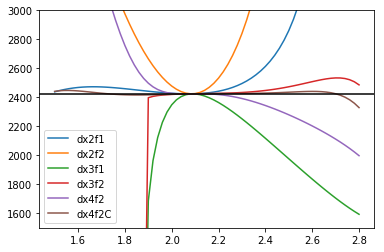

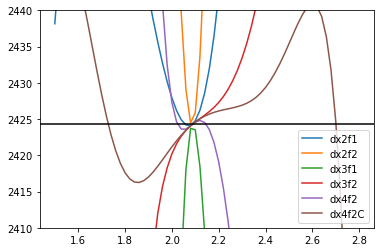

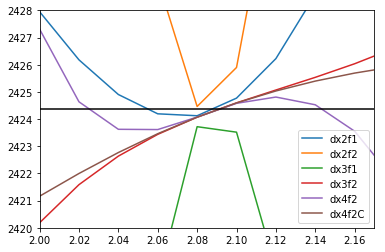

In [45]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2424.36,color='black')
plt.ylim(1500,3000)
plt.legend()
plt.savefig('2nd_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2424.36,color='black')
#plt.xlim(1.9,2.3) #+-.2 bohr
plt.ylim(2410,2440)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[1] for x in DerivativesH05],label='dx2f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx2f2(*x)[1] for x in DerivativesH05],label='dx2f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[1] for x in DerivativesH05],label='dx3f1')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f2(*x)[1] for x in DerivativesH05],label='dx3f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[1] for x in DerivativesH05],label='dx4f2')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2C(*x)[1] for x in DerivativesH05],label='dx4f2C')
plt.axhline(2424.36,color='black')
plt.xlim(2.0,2.17) #+-.05 bohr
plt.ylim(2420,2428)
plt.savefig('2nd_05fd_zoom.jpg')
plt.legend()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


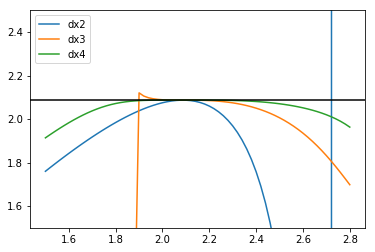

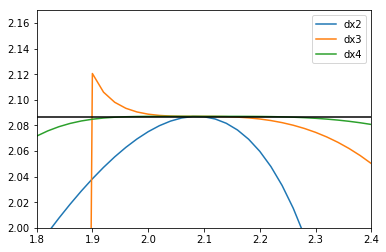

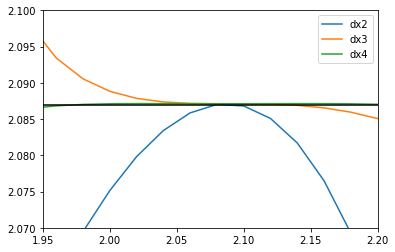

In [46]:
plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(1.5,2.5)
plt.legend()
plt.savefig('dist_05fd.jpg')
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(2.0,2.17)
plt.xlim(1.8,2.4)
plt.legend()
plt.show()

plt.plot([x[0] for x in DerivativesH05] ,[dx2f1(*x)[0] for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[dx3f1(*x)[0] for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[dx4f2(*x)[0] for x in DerivativesH05],label='dx4')
plt.axhline(2.087,color='black')
plt.ylim(2.07,2.10)
plt.xlim(1.95,2.2)
plt.legend()
plt.savefig('dist_05fd_zoom.jpg')
plt.show()

/home/giorgiod/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


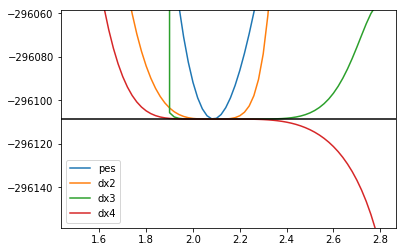

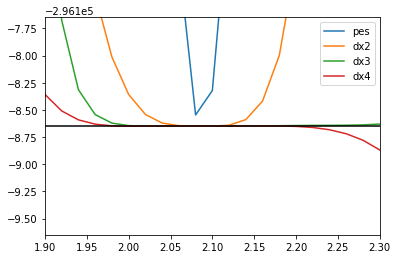

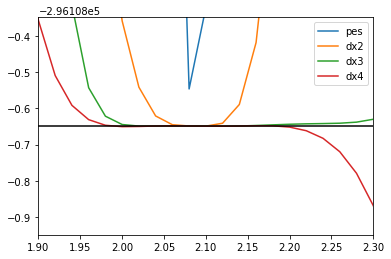

In [47]:
kjm=2625.50

plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-50,-112.78181256*kjm+50)
plt.legend()
plt.savefig('en_05fd.jpg')
plt.show()

# chemycal accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-1,-112.78181256*kjm+1)
plt.xlim(1.9,2.3)
plt.legend()
plt.show()

# .1 Kj/mol accuracy
kjm=2625.50
plt.plot([x[0] for x in DerivativesH05],[x[1]*kjm  for x in DerivativesH05],label='pes')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx2f1(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx2')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx3f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx3')
plt.plot([x[0] for x in DerivativesH05] ,[taylor4(dx4f2(*x)[0]-x[0],*x[1:])*kjm for x in DerivativesH05],label='dx4')
plt.axhline(-112.78181256*kjm,color='black')
plt.ylim(-112.78181256*kjm-.3,-112.78181256*kjm+.3)
plt.xlim(1.9,2.3)
plt.legend()
plt.savefig('en_05fd_zoom.jpg')
plt.show()

In [219]:
%store DerivativesH001
%store DerivativesH05

Stored 'DerivativesH001' (list)
Stored 'DerivativesH05' (list)


In [3]:
%store -r